In [1]:
library(igraph)
library(parallel)
n_cores_use <- 4


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
getwd()

[1] "/media/inunez/4tb/BSC_Machine_January_24/Desktop/Sex_Comorbidities/Sex_Comorbidities"

In [3]:
### Set Sex for analysis
sex <- 'men'

epidemiology <- read.table('Epidemiology_ICD10.txt',sep='\t',header=T)


if(sex=='women'){
    setwd('Women/')
    out <- ('../Plots/Women_Positive/')
    sign_epidemiology <- epidemiology[epidemiology[,'womenRR2.5'] > 1.01,c('A','B','womenRR2.5')]
    red_completa <- read.table('../ICD10_Women_binarized_network.txt',header=T)
}

if(sex=='men'){
    setwd('Men/')
    out <- ('../Plots/Men_Positive/')
    sign_epidemiology <- epidemiology[epidemiology[,'menRR2.5'] > 1.01,c('A','B','menRR2.5')]
    red_completa <- read.table('../ICD10_Men_binarized_network.txt',header=T)
}

if(sex=='adjusted'){
    setwd('Adjusted/')
    out <- ('../Plots/Adjusted_Positive/')
    sign_epidemiology <- epidemiology[epidemiology[,'adjustedRR2.5'] > 1.01,c('A','B','adjustedRR2.5')]
    red_completa <- read.table('../ICD10_Adjusted_binarized_network.txt',header=T)
}

In [4]:
set.seed(2024)

In [5]:
nets <- as.list(list.files())
nets

[[1]]
[1] "Autophagy_ICD10_Men_binarized_network.txt"

[[2]]
[1] "Cell_Cycle_ICD10_Men_binarized_network.txt"

[[3]]
[1] "Cell-Cell_communication_ICD10_Men_binarized_network.txt"

[[4]]
[1] "Cellular_responses_to_stimuli_ICD10_Men_binarized_network.txt"

[[5]]
[1] "Chromatin_organization_ICD10_Men_binarized_network.txt"

[[6]]
[1] "Circadian_Clock_ICD10_Men_binarized_network.txt"

[[7]]
[1] "Developmental_Biology_ICD10_Men_binarized_network.txt"

[[8]]
[1] "Disease_ICD10_Men_binarized_network.txt"

[[9]]
[1] "DNA_Repair_ICD10_Men_binarized_network.txt"

[[10]]
[1] "DNA_Replication_ICD10_Men_binarized_network.txt"

[[11]]
[1] "Drug_ADME_ICD10_Men_binarized_network.txt"

[[12]]
[1] "Extracellular_matrix_organization_ICD10_Men_binarized_network.txt"

[[13]]
[1] "Gene_expression_Transcription_ICD10_Men_binarized_network.txt"

[[14]]
[1] "Hemostasis_ICD10_Men_binarized_network.txt"

[[15]]
[1] "Immune_System_ICD10_Men_binarized_network.txt"

[[16]]
[1] "Metabolism_ICD10_Men_binarized_network.txt"

[[17]]
[1] "Metabolism_of_proteins_ICD10_Men_binarized_network.txt"

[[18]]
[1] "Metabolism_of_RNA_ICD10_Men_binarized_network.txt"

[[19]]
[1] "Mitochondria_All_ICD10_Men_binarized_network.txt"

[[20]]
[1] "Muscle_contraction_ICD10_Men_binarized_network.txt"

[[21]]
[1] "Neuronal_System_ICD10_Men_binarized_network.txt"

[[22]]
[1] "Organelle_biogenesis_and_maintenance_ICD10_Men_binarized_network.txt"

[[23]]
[1] "Programmed_Cell_Death_ICD10_Men_binarized_network.txt"

[[24]]
[1] "Protein_localization_ICD10_Men_binarized_network.txt"

[[25]]
[1] "Reproduction_ICD10_Men_binarized_network.txt"

[[26]]
[1] "Sensory_Perception_ICD10_Men_binarized_network.txt"

[[27]]
[1] "Signal_Transduction_ICD10_Men_binarized_network.txt"

[[28]]
[1] "Transport_of_small_molecules_ICD10_Men_binarized_network.txt"

[[29]]
[1] "Vesicle-mediated_transport_ICD10_Men_binarized_network.txt"

In [6]:
 networks <- lapply(nets,function(x) read.table(x,sep='\t',header=T))
names(networks) <- nets
networks <- lapply(networks,function(x) x[,c('Disease1','Disease2','EuclideanAll')])
comorbidity_networks <- lapply(networks,function(x) x[x[,'EuclideanAll']==1,])
inverse_networks <- lapply(networks,function(x) x[x[,'EuclideanAll']==-1,])

In [7]:
head(comorbidity_networks[[1]])
dim(comorbidity_networks[[1]])

,Disease1,Disease2,EuclideanAll
,<chr>,<chr>,<int>
3,A71,B19,1
19,A71,C73,1
37,A71,F20,1
61,A71,K51,1
62,A71,K58,1
74,A71,Q98,1


[1] 112   3

In [8]:
head(inverse_networks[[1]])
dim(inverse_networks[[1]])

,Disease1,Disease2,EuclideanAll
,<chr>,<chr>,<int>
180,B17,D75,-1
201,B17,I63,-1
221,B17,N19,-1
335,B44,G10,-1
340,B44,G35,-1
345,B44,I48,-1


[1] 40  3

In [9]:
library(igraph)

In [10]:
comorbidity_networks <- lapply(comorbidity_networks, function(x) graph_from_data_frame(x[,1:2],directed=F))

In [11]:
gr_union <- Reduce(igraph::union,comorbidity_networks)
gr_union
head(igraph::as_data_frame(gr_union))
tail(igraph::as_data_frame(gr_union))

IGRAPH d230417 UN-- 77 1641 -- 
+ attr: name (v/c)
+ edges from d230417 (vertex names):
 [1] L82--T86 I63--F84 I63--T86 I48--T86 I48--L82 I48--I63 I42--T86 I42--L82
 [9] I42--I48 G31--T86 G31--L82 G31--I63 G31--I48 F33--L82 F33--I48 F33--G31
[17] D72--F84 D72--I63 D56--I42 D56--G31 C93--F84 C93--L82 C93--F33 C93--D72
[25] C93--D56 C92--I48 C92--I42 C92--G31 C92--G12 C92--F33 C92--C93 C90--F84
[33] C90--G12 C90--D72 C90--C92 C82--T86 C82--I48 C82--G31 C82--F33 C82--D56
[41] C82--C92 B17--F84 B17--T86 B17--L82 B17--I48 B17--I42 B17--G31 B17--F33
[49] B17--D72 B17--C82 L71--T86 L71--L82 L71--G31 L71--G12 L71--D72 L71--D56
[57] L71--C93 L71--C90 G35--T86 G35--L82 G35--I63 G35--I48 G35--F33 G35--D72
+ ... omitted several edges

,from,to
,<chr>,<chr>
1,L82,T86
2,I63,F84
3,I63,T86
4,I48,T86
5,I48,L82
6,I48,I63


,from,to
,<chr>,<chr>
1636,A71,C15
1637,A71,C14
1638,A71,C11
1639,A71,B44
1640,A71,B19
1641,A71,A90


In [12]:
color_tab <- read.table('../ICD10_colors.txt',sep='\t',header = T,comment.char = "")
head(color_tab)

,ICD10,ICD10_category,ICD10_colors
,<chr>,<chr>,<chr>
1,A04,Certain infectious and parasitic diseases,#4EF9EA
2,A15,Certain infectious and parasitic diseases,#4EF9EA
3,A63,Certain infectious and parasitic diseases,#4EF9EA
4,A71,Certain infectious and parasitic diseases,#4EF9EA
5,A81,Certain infectious and parasitic diseases,#4EF9EA
6,A90,Certain infectious and parasitic diseases,#4EF9EA


In [13]:
id_tab <- data.frame(1:length(names(V(gr_union))),names(V(gr_union)))
colnames(id_tab) <- c('node_id','name')
head(id_tab)
tail(id_tab)

,node_id,name
,<int>,<chr>
1,1,A71
2,2,A90
3,3,B19
4,4,B44
5,5,C11
6,6,C14


,node_id,name
,<int>,<chr>
72,72,I42
73,73,I48
74,74,I63
75,75,L82
76,76,T86
77,77,F84


In [14]:
library(RandomWalkRestartMH)

In [15]:
#Create the Reference Multilayer Network

Multiplex_Comorbidity <- create.multiplex(LayersList = comorbidity_networks)


# Create and Normalize SupraAdjacencyMatrix

AdjMatrix_Comor <- compute.adjacency.matrix(Multiplex_Comorbidity)
AdjMatrixNorm_Comor <- normalize.multiplex.adjacency(AdjMatrix_Comor)

In [16]:
names(V(gr_union)) #All nodes of the multilayer network

[1] "A71" "A90" "B19" "B44" "C11" "C14" "C15" "C16" "C22" "C25" "C34" "C38"
[13] "C49" "C61" "C64" "C67" "C71" "C73" "C84" "D45" "D46" "D47" "D75" "D82"
[25] "D86" "E10" "E11" "F20" "G10" "G20" "H31" "I21" "I73" "J44" "J45" "K51"
[37] "K58" "K70" "L40" "L70" "M47" "Q98" "M33" "R65" "G71" "J32" "K12" "K13"
[49] "C18" "K50" "F31" "C74" "J84" "G30" "N02" "F17" "M35" "N19" "Q87" "G35"
[61] "L71" "B17" "C82" "C90" "C92" "C93" "D56" "D72" "F33" "G12" "G31" "I42"
[73] "I48" "I63" "L82" "T86" "F84"

In [17]:
head(color_tab) #Diseases and Categories

,ICD10,ICD10_category,ICD10_colors
,<chr>,<chr>,<chr>
1,A04,Certain infectious and parasitic diseases,#4EF9EA
2,A15,Certain infectious and parasitic diseases,#4EF9EA
3,A63,Certain infectious and parasitic diseases,#4EF9EA
4,A71,Certain infectious and parasitic diseases,#4EF9EA
5,A81,Certain infectious and parasitic diseases,#4EF9EA
6,A90,Certain infectious and parasitic diseases,#4EF9EA


In [18]:
length(unique(color_tab$ICD10_category)) #N Disease Categories

[1] 16

In [19]:
list_disease_types <- split(color_tab$ICD10,color_tab$ICD10_category)

In [20]:
list_disease_types$`Diseases of the eye and adnexa` <- NULL 
#This class has no members in the Multiplex Net
list_disease_types

$`Certain infectious and parasitic diseases`
 [1] "A04" "A15" "A63" "A71" "A81" "A90" "B17" "B19" "B44" "B55" "B97"

$`Congenital malformations, deformations and chromosomal abnormalities`
[1] "Q05" "Q82" "Q87" "Q96" "Q98"

$`Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism`
[1] "D56" "D57" "D69" "D72" "D75" "D76" "D82" "D86"

$`Diseases of the circulatory system`
[1] "I21" "I25" "I42" "I48" "I63" "I73"

$`Diseases of the digestive system`
[1] "K12" "K13" "K50" "K51" "K58" "K70"

$`Diseases of the genitourinary system`
[1] "N01" "N02" "N19" "N30" "N80"

$`Diseases of the musculoskeletal system and connective tissue`
[1] "M19" "M32" "M33" "M35" "M47" "M60"

$`Diseases of the nervous system`
[1] "G10" "G12" "G20" "G30" "G31" "G35" "G71" "G72"

$`Diseases of the respiratory system`
[1] "J30" "J32" "J44" "J45" "J84"

$`Diseases of the skin and subcutaneous tissue`
[1] "L20" "L40" "L65" "L70" "L71" "L80" "L82"

$`Endocrine, nutritional and metabolic diseases`
[1] "E10" "E11" "E28" "E34" "E88"

$`Injury, poisoning and certain other consequences of external causes`
[1] "T86"

$`Mental and behavioural disorders`
[1] "F17" "F20" "F31" "F33" "F84"

$Neoplasms
 [1] "C11" "C14" "C15" "C16" "C18" "C22" "C25" "C34" "C38" "C41" "C43" "C49"
[13] "C50" "C53" "C56" "C57" "C61" "C64" "C67" "C71" "C73" "C74" "C79" "C82"
[25] "C84" "C90" "C91" "C92" "C93" "D45" "D46" "D47"

$`Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified`
[1] "R65"

In [21]:
# Function to compute the RWR probability of each target node
# category_elements is an element from list_disease_types (i.e., printed list in previous cell)

reference_RWR <- function(source_category,target_category){
    target_nodes <- target_category[target_category %in% names(V(gr_union))] #Target nodes are the ones of the category
    source_nodes <- source_category[source_category %in% names(V(gr_union))]
    target_nodes <- c(target_nodes,source_nodes)
    seed_test <- names(V(gr_union))[!names(V(gr_union)) %in% target_nodes] #Seed are all but the targets (1)
    #seed_test <- seed_test[!seed_test %in% source_nodes] #Take source nodes from the seed set
    ori_multiplex_RWR_Results <- 'Own Class'
    if(length(seed_test)<length(names(V(gr_union)))){ #Only perform if any node is available
        ori_multiplex_RWR_Results <- Random.Walk.Restart.Multiplex(AdjMatrixNorm_Comor,
                        Multiplex_Comorbidity,
                        Seeds= seed_test,
                        r=0.7)
    }
    ori_multiplex_RWR_Results[[1]] <- ori_multiplex_RWR_Results[[1]][!ori_multiplex_RWR_Results[[1]][,1] %in% source_category,]
    if(nrow(ori_multiplex_RWR_Results[[1]])==0){
        ori_multiplex_RWR_Results[[1]] <- data.frame(source_nodes,0)
        colnames(ori_multiplex_RWR_Results[[1]])[2] <- 'Score'
    }
    return(ori_multiplex_RWR_Results)
}

In [22]:
all_reference_RWR <- mclapply(list_disease_types,function(x) 
    reference_RWR(source_category =  list_disease_types$Neoplasms,target_category = x),mc.cores=n_cores_use)


In [23]:
all_reference_RWR$Neoplasms

Top 10 ranked Nodes:
   source_nodes Score
1           C11     0
2           C14     0
3           C15     0
4           C16     0
5           C18     0
6           C22     0
7           C25     0
8           C34     0
9           C38     0
10          C49     0

Seed Nodes used:
 [1] "A71" "A90" "B19" "B44" "D75" "D82" "D86" "E10" "E11" "F20" "G10" "G20"
[13] "H31" "I21" "I73" "J44" "J45" "K51" "K58" "K70" "L40" "L70" "M47" "Q98"
[25] "M33" "R65" "G71" "J32" "K12" "K13" "K50" "F31" "J84" "G30" "N02" "F17"
[37] "M35" "N19" "Q87" "G35" "L71" "B17" "D56" "D72" "F33" "G12" "G31" "I42"
[49] "I48" "I63" "L82" "T86" "F84"

In [24]:
# Function to remove all nodes of a disease category from the multiplex network

remove_category_from_multiplex <- function(source_category){
    category_to_remove <- source_category
    nodes_to_remove <- category_to_remove[category_to_remove %in% names(V(gr_union))]
    comorbidity_networks_nodes_removed <- mclapply(comorbidity_networks,function(x) delete_vertices(x,nodes_to_remove[nodes_to_remove %in% names(V(x))]),mc.cores = n_cores_use)
    gr_union_nodes_removed <- Reduce(igraph::union,comorbidity_networks_nodes_removed)
    Multiplex_Comorbidity_Rem <- create.multiplex(LayersList = comorbidity_networks_nodes_removed)

    # Create and Normalize SupraAdjacencyMatrix

    AdjMatrix_Comor_Rem <- compute.adjacency.matrix(Multiplex_Comorbidity_Rem)
    AdjMatrixNorm_Comor_Rem <- normalize.multiplex.adjacency(AdjMatrix_Comor_Rem)
    res <- list(Multiplex_Comorbidity_Rem,AdjMatrixNorm_Comor_Rem,gr_union_nodes_removed)
    #names(res) <- list('multiplex','norm_matrix')
}

In [25]:
new_multilayer <- remove_category_from_multiplex(source_category = list_disease_types$Neoplasms)
#This results in a new multiplex where we removed the nodes from selected disease category.

In [26]:
# # Function to compute the RWR probability of each target node, but with the new multilayer network

reference_RWR_removed_nodes <- function(category_elements,multiplex_network){
    target_nodes <- category_elements[category_elements %in% names(V(multiplex_network[[3]]))] #Target nodes are the ones of the category
    seed_test <- names(V(multiplex_network[[3]]))[!names(V(multiplex_network[[3]])) %in% target_nodes] #Seed are all but the targets
    ori_multiplex_RWR_Results <- 'Own Class'
    if(length(seed_test)<length(names(V(multiplex_network[[3]])))){ #Only perform if any node is available
        ori_multiplex_RWR_Results <- Random.Walk.Restart.Multiplex(multiplex_network[[2]],
                        multiplex_network[[1]],
                        Seeds= seed_test,
                        r=0.7)
    }
    return(ori_multiplex_RWR_Results)
}

In [27]:
list_disease_types$Neoplasms %in% names(V(gr_union))

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE
[13] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
[25]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE

In [28]:
# Compute the new RWR scores
all_removed_RWR <- mclapply(list_disease_types, function(x) reference_RWR_removed_nodes(x,multiplex_network = new_multilayer),mc.cores = n_cores_use)

In [29]:
all_removed_RWR$Neoplasms

[1] "Own Class"

In [30]:
unlist(split(all_removed_RWR[[1]][[1]][,2],all_removed_RWR[[1]][[1]][,1]))

A71          A90          B17          B19          B44 
1.905544e-04 1.191102e-04 6.873953e-05 1.262487e-04 5.870650e-05

In [31]:
names(all_reference_RWR) == names(all_removed_RWR)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [32]:
get_RWR_diff <- function(original_rwr,removed_rwr){
    list_diff <- list()
     for(i in 1:length(original_rwr)){
        cu <- original_rwr[[i]][[1]][,2]
        d <- original_rwr[[i]][[1]][,1]
        list_diff[[i]] <- unlist(split(cu,d))-unlist(split(cu,d)) # set 0 to the own calculation
        if(length(removed_rwr[[i]])>1){
            as <- removed_rwr[[i]][[1]][,2]
            bs <- removed_rwr[[i]][[1]][,1]
            numerador <- unlist(split(as,bs))
            denominador <- unlist(split(cu,d))
            list_diff[[i]] <- log2(numerador/denominador) #log2 ratio between removed / and original net
        }
    }
    names(list_diff) <- names(original_rwr)
    return(list_diff)

}

In [33]:
all_reference_RWR[[14]]

Top 10 ranked Nodes:
   source_nodes Score
1           C11     0
2           C14     0
3           C15     0
4           C16     0
5           C18     0
6           C22     0
7           C25     0
8           C34     0
9           C38     0
10          C49     0

Seed Nodes used:
 [1] "A71" "A90" "B19" "B44" "D75" "D82" "D86" "E10" "E11" "F20" "G10" "G20"
[13] "H31" "I21" "I73" "J44" "J45" "K51" "K58" "K70" "L40" "L70" "M47" "Q98"
[25] "M33" "R65" "G71" "J32" "K12" "K13" "K50" "F31" "J84" "G30" "N02" "F17"
[37] "M35" "N19" "Q87" "G35" "L71" "B17" "D56" "D72" "F33" "G12" "G31" "I42"
[49] "I48" "I63" "L82" "T86" "F84"

In [34]:
length(all_reference_RWR)

[1] 15

In [35]:
get_RWR_diff(original_rwr = all_reference_RWR,removed_rwr = all_removed_RWR)

$`Certain infectious and parasitic diseases`
      A71       A90       B17       B19       B44 
0.5700143 0.5036556 0.3142085 0.5676692 0.3913411 

$`Congenital malformations, deformations and chromosomal abnormalities`
      Q87       Q98 
0.4501718 0.6122257 

$`Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism`
      D56       D72       D75       D82       D86 
0.6106585 0.5115197 0.4198974 0.3811294 0.3632093 

$`Diseases of the circulatory system`
      I21       I42       I48       I63       I73 
0.4292633 0.3187345 0.3088089 0.4312265 0.4239198 

$`Diseases of the digestive system`
      K12       K13       K50       K51       K58       K70 
0.5607180 0.4938446 0.5229414 0.5751361 0.4191227 0.5886449 

$`Diseases of the genitourinary system`
      N02       N19 
0.4830432 0.4176552 

$`Diseases of the musculoskeletal system and connective tissue`
      M33       M35       M47 
0.5540580 0.4838171 0.3547689 

$`Diseases of the nervous system`
      G10       G12       G20       G30       G31       G35       G71 
0.2570163 0.5178780 0.4544958 0.3945225 0.4004648 0.2568237 0.6084184 

$`Diseases of the respiratory system`
      J32       J44       J45       J84 
0.5849701 0.4211824 0.3603474 0.4376550 

$`Diseases of the skin and subcutaneous tissue`
      L40       L70       L71       L82 
0.5062564 0.5481028 0.6626836 0.2920979 

$`Endocrine, nutritional and metabolic diseases`
      E10       E11 
0.4152559 0.3529625 

$`Injury, poisoning and certain other consequences of external causes`
      T86 
0.2991642 

$`Mental and behavioural disorders`
      F17       F20       F31       F33       F84 
0.4705988 0.5187081 0.5819492 0.2045101 0.2722901 

$Neoplasms
C11 C14 C15 C16 C18 C22 C25 C34 C38 C49 C61 C64 C67 C71 C73 C74 C82 C84 C90 C92 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
C93 D45 D46 D47 
  0   0   0   0 

$`Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified`
      R65 
0.4318004

#### Recursive analysis for all classes

In [36]:
library(reshape2)
library(ggplot2)

In [37]:
list_diff_per_category <- list()
for(i in 1:length(list_disease_types)){
    categoria_a_eliminar <- list_disease_types[[i]]
    temp_all_reference_RWR <- mclapply(list_disease_types, function(x) reference_RWR(source_category = categoria_a_eliminar,target_category = x),mc.cores = n_cores_use)
    nuevo_multilayer <- remove_category_from_multiplex(source_category = categoria_a_eliminar)
    temp_all_removed_RWR <- mclapply(list_disease_types, function(x) reference_RWR_removed_nodes(x,multiplex_network = nuevo_multilayer),mc.cores = n_cores_use)
    temp_cus <- get_RWR_diff(original_rwr = temp_all_reference_RWR,removed_rwr = temp_all_removed_RWR)
    list_diff_per_category[[i]] <- temp_cus
    message(i)
}
names(list_diff_per_category) <- names(list_disease_types)



1

2

3

4

5

6

7

8

9

10

11

12

13

14

15



In [38]:
list_diff_per_category <- mclapply(list_diff_per_category,
    function(y) Reduce(rbind,mclapply(y,
        function(x) t(data.frame(as.list(x))),mc.cores = n_cores_use)),
        mc.cores = n_cores_use)

In [39]:
disease_vs_removed_category <- Reduce(cbind,list_diff_per_category)
colnames(disease_vs_removed_category) <- names(list_diff_per_category)

# Heatmap

disease_vs_removed_category_heatmap <- melt(t(scale(disease_vs_removed_category))) #Scale values per removed disease

colnames(disease_vs_removed_category_heatmap)[1:2] <- c('Removed_Disease_Category','Diseases')
head(disease_vs_removed_category_heatmap)

,Removed_Disease_Category,Diseases,value
,<fct>,<fct>,<dbl>
1,Certain infectious and parasitic diseases,A71,-2.32845582
2,"Congenital malformations, deformations and chromosomal abnormalities",A71,-0.29979726
3,Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism,A71,-0.04300427
4,Diseases of the circulatory system,A71,-0.54707197
5,Diseases of the digestive system,A71,0.49044643
6,Diseases of the genitourinary system,A71,-0.30871776


In [45]:
disease_vs_removed_category_heatmap$category_Disease <- color_tab$ICD10_category[match(disease_vs_removed_category_heatmap$Diseases,color_tab$ICD10)]

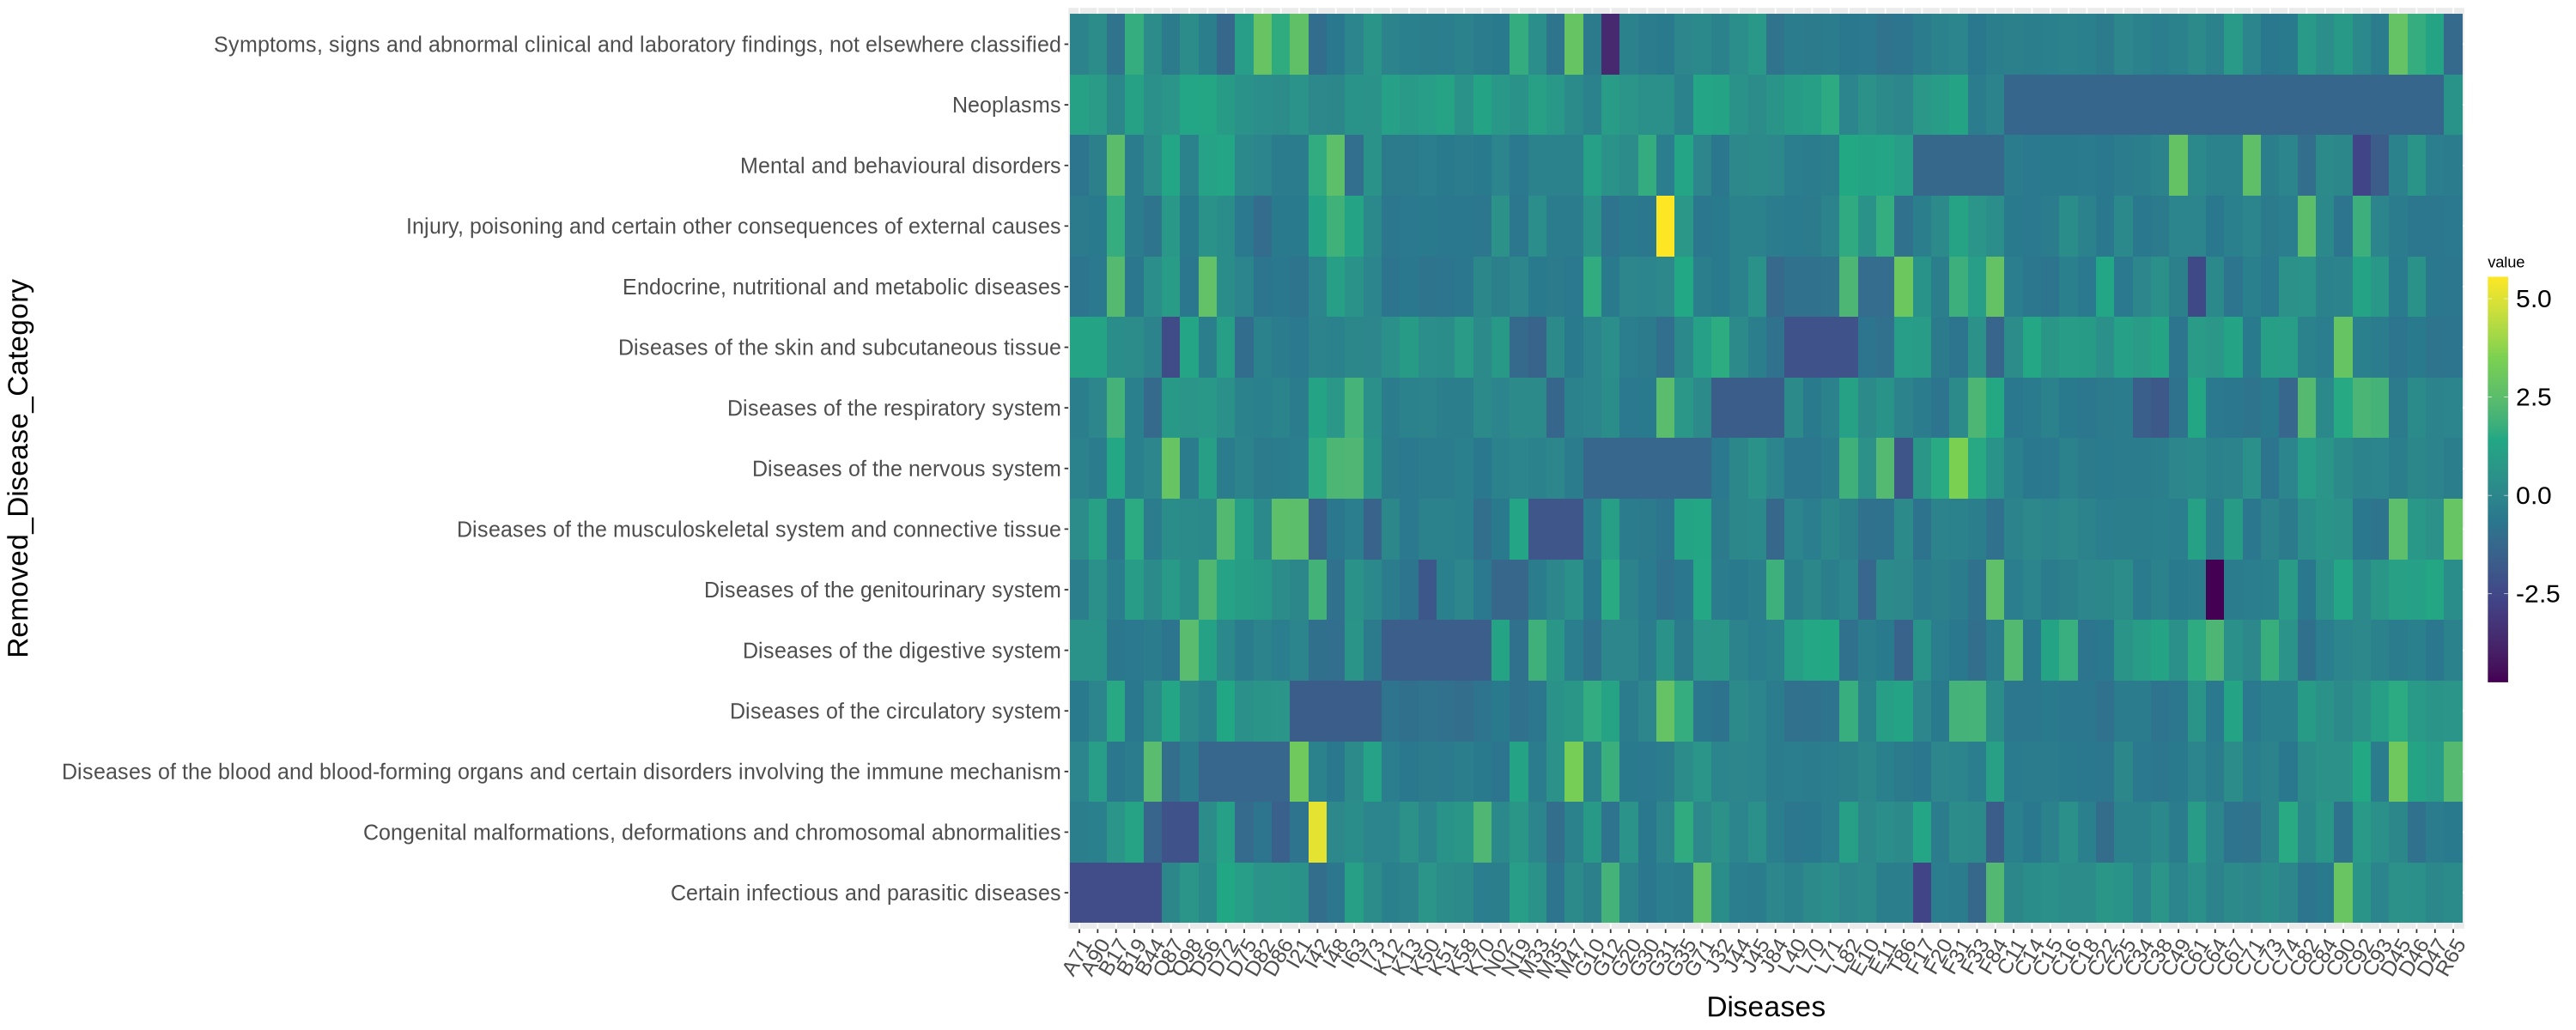

In [47]:


options(repr.plot.width=25, repr.plot.height=10)
ggplot(data = data.frame(disease_vs_removed_category_heatmap), aes(x = Diseases, y = Removed_Disease_Category, fill= value)) + 
geom_tile() +
scale_fill_viridis_c(begin=0,end=1)+
theme(
        axis.text.x = element_text(angle = 60, vjust = 1, hjust=1,size=15),
        axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0),size=20),
        axis.text.y = element_text( vjust = 0.5, hjust=1,size=15),
        axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0),size=20),
        legend.text = element_text(size=18),
        legend.key.size = unit(2, 'cm'),
        legend.key.width= unit(0.5, 'cm'),
        
    )

In [48]:
head(disease_vs_removed_category)

,Certain infectious and parasitic diseases,"Congenital malformations, deformations and chromosomal abnormalities",Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism,Diseases of the circulatory system,Diseases of the digestive system,Diseases of the genitourinary system,Diseases of the musculoskeletal system and connective tissue,Diseases of the nervous system,Diseases of the respiratory system,Diseases of the skin and subcutaneous tissue,"Endocrine, nutritional and metabolic diseases","Injury, poisoning and certain other consequences of external causes",Mental and behavioural disorders,Neoplasms,"Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified"
A71,0.00000000,0.008662345,0.06187031,0.04007456,0.12424955,0.02199222,0.05957083,0.07137534,0.05721873,0.126924027,0.009137391,0.003983775,0.01921540,0.5700143,0.021022296
A90,0.00000000,0.008777574,0.11018403,0.05467882,0.12812003,0.03687732,0.08168843,0.06112790,0.07005300,0.125735032,0.013140790,0.003756786,0.03586311,0.5036556,0.029245793
B17,0.00000000,0.012974159,0.03139985,0.10988094,0.05927565,0.02126304,0.03361874,0.17849196,0.15107107,0.091008094,0.088187576,0.025288061,0.13371154,0.3142085,0.007190371
B19,0.00000000,0.015605575,0.04217436,0.03687726,0.06400833,0.04935171,0.09370429,0.06747564,0.05899306,0.088913018,0.011254090,0.004623897,0.02990426,0.5676692,0.058815482
B44,0.00000000,0.003553272,0.18180725,0.06591439,0.07270362,0.03375585,0.04142581,0.08565506,0.02251468,0.074472653,0.036300477,0.001002398,0.05365046,0.3913411,0.029452898
Q87,0.09124759,0.000000000,0.01346019,0.10417476,0.05303181,0.04769651,0.06054259,0.27592748,0.10352458,-0.007808244,0.052092846,0.016132608,0.09230714,0.4501718,0.014588966


In [49]:
write.table(disease_vs_removed_category,file=paste0(out,'Disease_vs_Removed_Category_RWR_ratio.tsv'),sep='\t')

Recursive analysis for all diseases

In [50]:
list_diseases <- as.list(names(V(gr_union)))
names(list_diseases) <- list_diseases
head(list_diseases)

$A71
[1] "A71"

$A90
[1] "A90"

$B19
[1] "B19"

$B44
[1] "B44"

$C11
[1] "C11"

$C14
[1] "C14"

In [51]:
list_diff_per_category <- list()
#temp_reference_RWR <- lapply(list_diseases, reference_RWR)

for(i in 1:length(list_diseases)){
#for(i in 1:2){
    categoria_a_eliminar <- list_diseases[[i]]
    temp_all_reference_RWR <- mclapply(list_diseases, function(x) reference_RWR(source_category = categoria_a_eliminar,target_category = x),mc.cores = n_cores_use)
    nuevo_multilayer <- remove_category_from_multiplex(source_category = categoria_a_eliminar)
    temp_all_removed_RWR <- mclapply(list_diseases, function(x) reference_RWR_removed_nodes(x,multiplex_network = nuevo_multilayer),mc.cores = n_cores_use)
    temp_cus <- get_RWR_diff(original_rwr = temp_all_reference_RWR,removed_rwr = temp_all_removed_RWR)
    list_diff_per_category[[i]] <- temp_cus
    message(i)
}
names(list_diff_per_category) <- names(list_diseases)





1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

18

19

20

21

22

23

24

25

26

27

28

29

30

31

32

33

34

35

36

37

38

39

40

41

42

43

44

45

46

47

48

49

50

51

52

53

54

55

56

57

58

59

60

61

62

63

64

65

66

67

68

69

70

71

72

73

74

75

76

77



In [52]:
head(list_diff_per_category[[3]])

$A71
       A71 
0.01842942 

$A90
       A90 
0.02070255 

$B19
B19 
  0 

$B44
       B44 
0.02820315 

$C11
       C11 
0.01909601 

$C14
       C14 
0.01544458

In [53]:
names(list_diff_per_category)

[1] "A71" "A90" "B19" "B44" "C11" "C14" "C15" "C16" "C22" "C25" "C34" "C38"
[13] "C49" "C61" "C64" "C67" "C71" "C73" "C84" "D45" "D46" "D47" "D75" "D82"
[25] "D86" "E10" "E11" "F20" "G10" "G20" "H31" "I21" "I73" "J44" "J45" "K51"
[37] "K58" "K70" "L40" "L70" "M47" "Q98" "M33" "R65" "G71" "J32" "K12" "K13"
[49] "C18" "K50" "F31" "C74" "J84" "G30" "N02" "F17" "M35" "N19" "Q87" "G35"
[61] "L71" "B17" "C82" "C90" "C92" "C93" "D56" "D72" "F33" "G12" "G31" "I42"
[73] "I48" "I63" "L82" "T86" "F84"

In [54]:
list_diff_per_category_2 <- mclapply(list_diff_per_category,
    function(y) Reduce(rbind,mclapply(y,
        function(x) t(data.frame(as.list(x))),mc.cores = n_cores_use)),
        mc.cores = n_cores_use)

disease_vs_removed_category <- Reduce(cbind,list_diff_per_category_2)
colnames(disease_vs_removed_category) <- names(list_diff_per_category_2)

In [55]:
included <- color_tab$ICD10[color_tab$ICD10 %in% row.names(disease_vs_removed_category)]

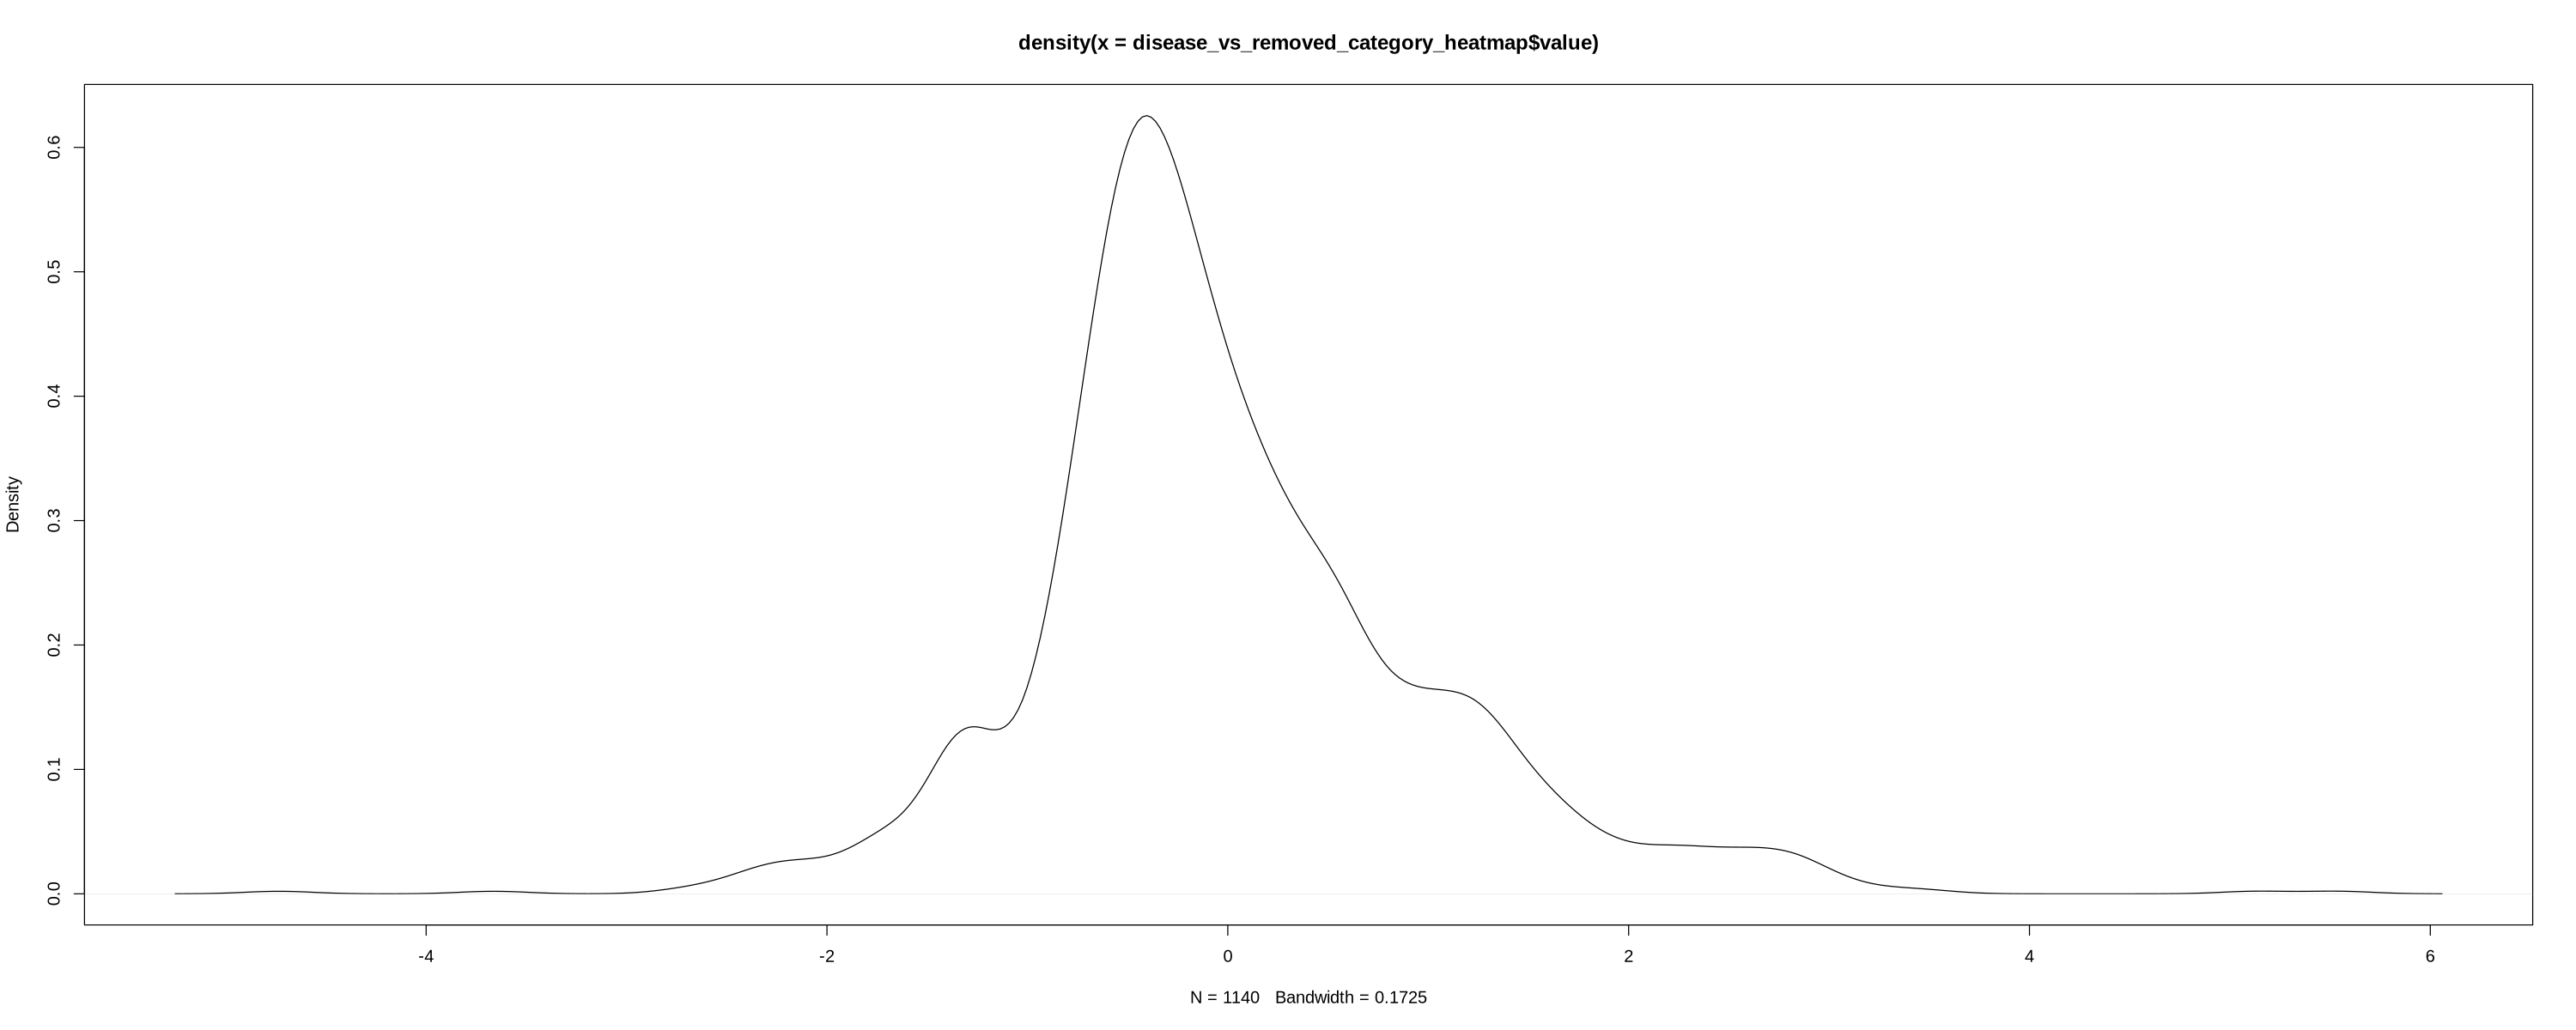

In [56]:
plot(density(disease_vs_removed_category_heatmap$value))

,Removed_Disease,Diseases,value
,<fct>,<fct>,<dbl>
1,A71,A71,-1.62733817
2,A90,A71,-0.04097756
3,B17,A71,-0.56308337
4,B19,A71,-0.04883268
5,B44,A71,-0.56863933
6,C11,A71,0.27123136


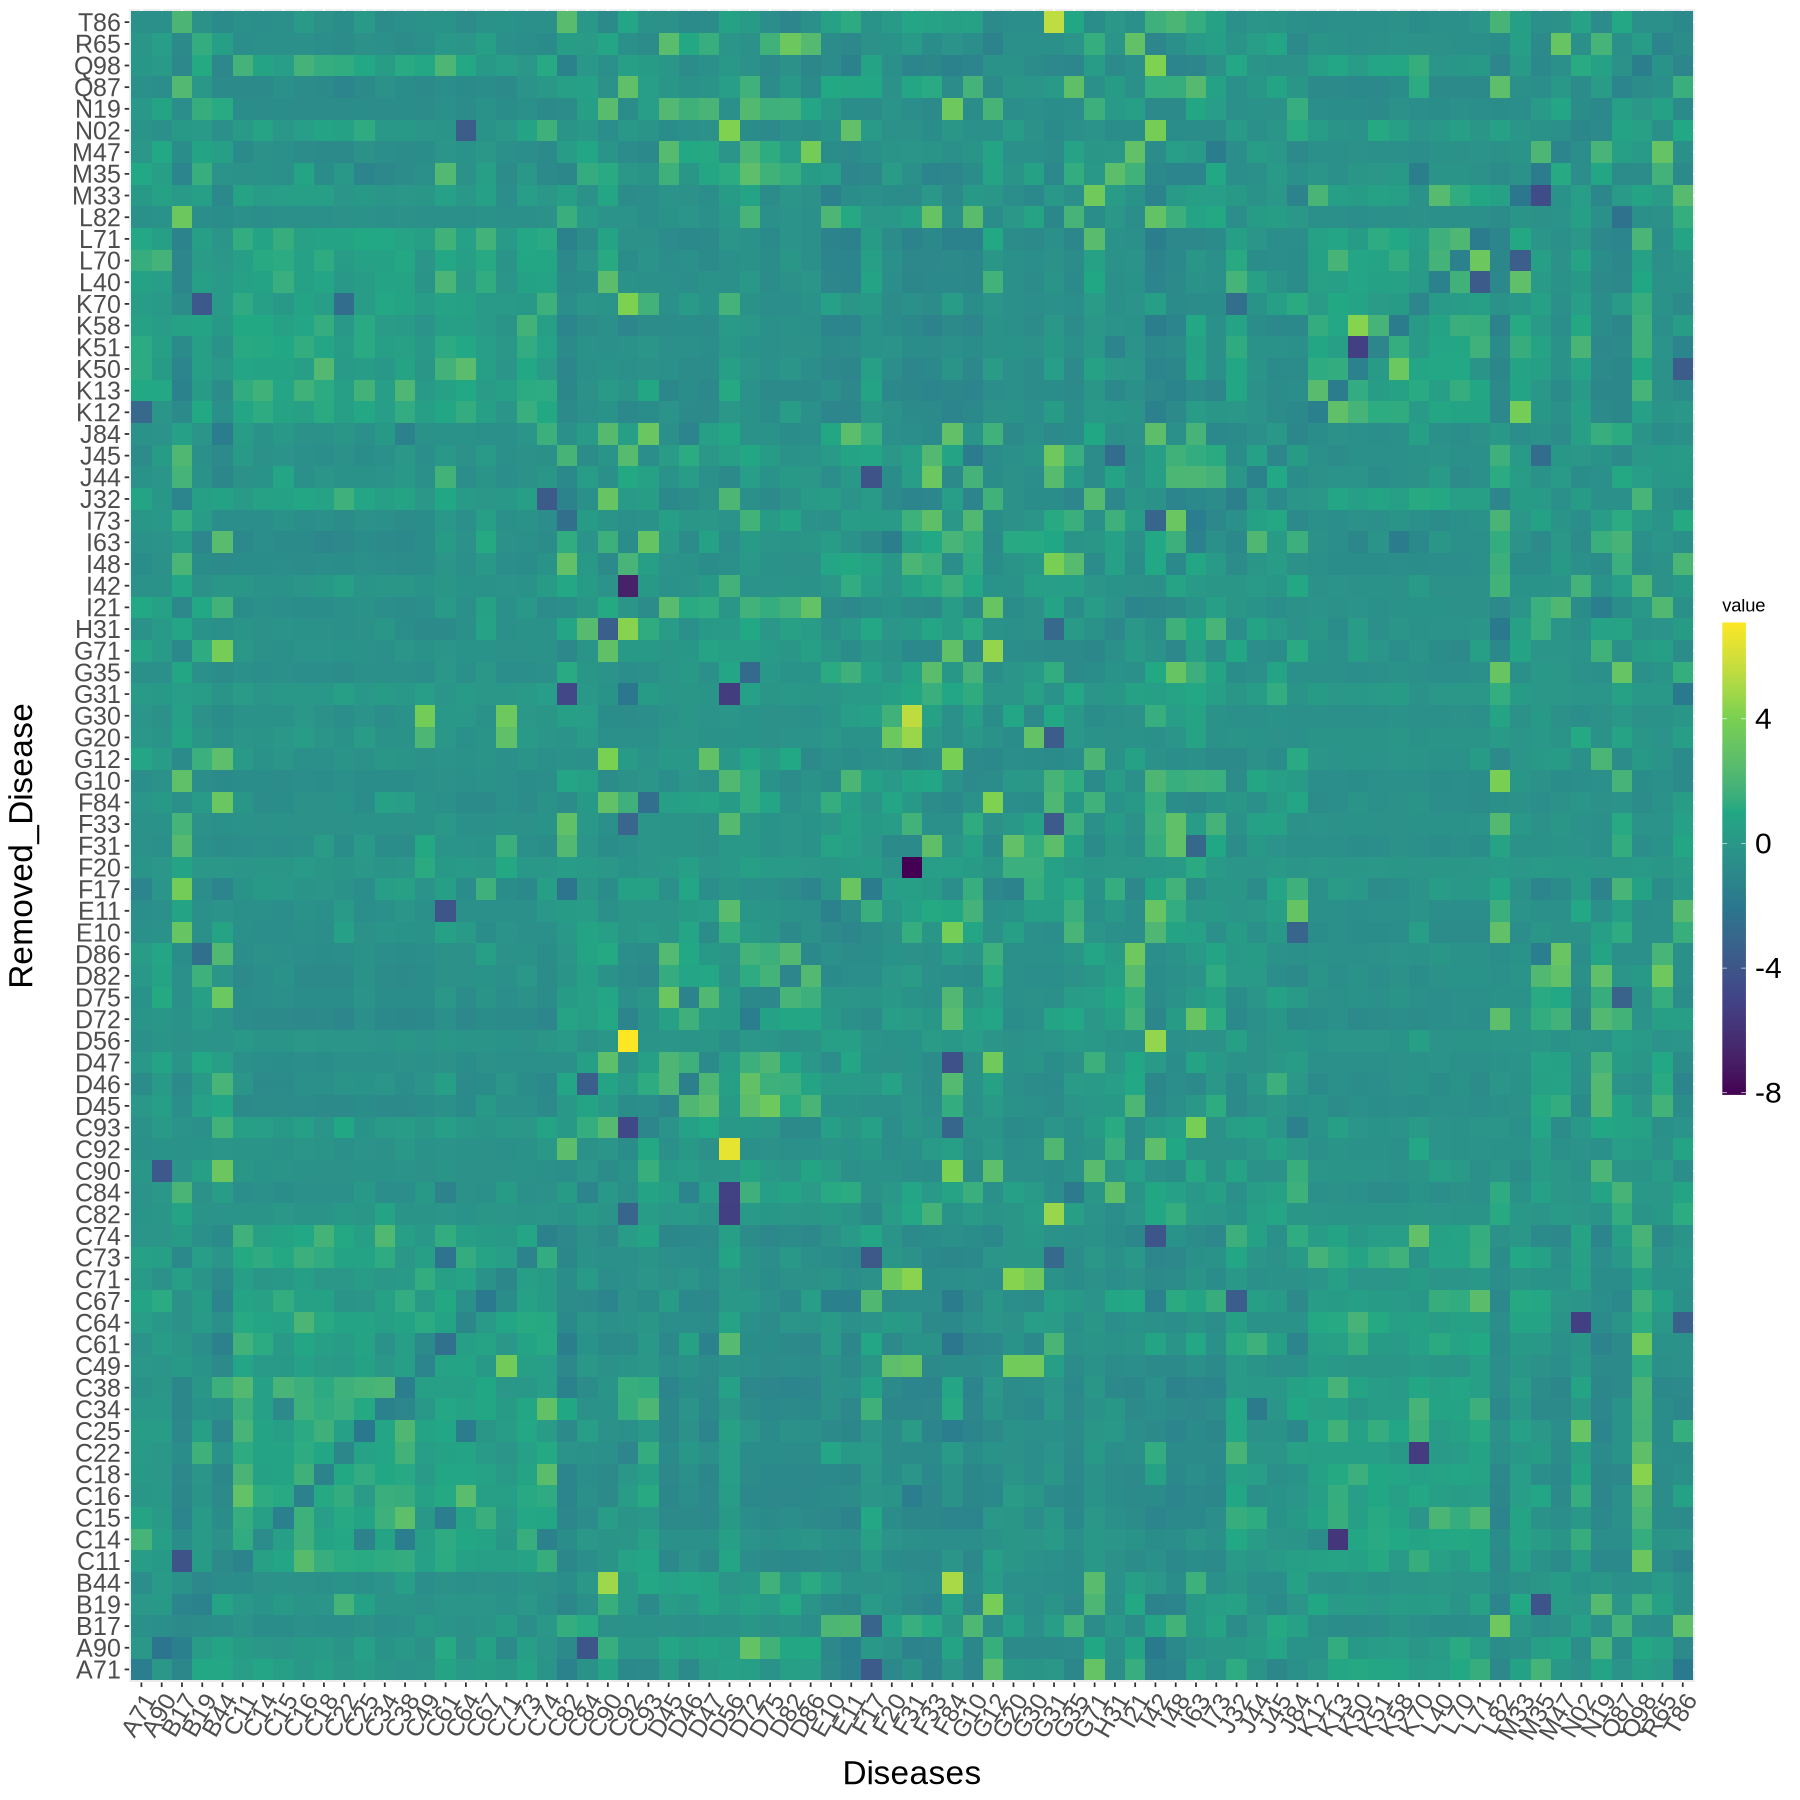

In [57]:
disease_vs_removed_category_heatmap <- melt(t(scale(disease_vs_removed_category[included,included]))) #Scale values per removed disease

colnames(disease_vs_removed_category_heatmap)[1:2] <- c('Removed_Disease','Diseases')
head(disease_vs_removed_category_heatmap)



options(repr.plot.width=15, repr.plot.height=15)
ggplot(data = data.frame(disease_vs_removed_category_heatmap), aes(x = Diseases, y = Removed_Disease, fill= value)) + 
    geom_tile() +
    scale_fill_viridis_c(begin=0,end=1)+
    #scale_fill_gradientn(colors = hcl.colors(20, "RdYlGn"))+
    theme(axis.text.x = element_text(angle = 60, vjust = 1, hjust=1,size=15),
        axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0),size=20),
        axis.text.y = element_text( vjust = 0.5, hjust=1,size=15),
        axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0),size=20),
        legend.text = element_text(size=18),
        legend.key.size = unit(2, 'cm'),
        legend.key.width= unit(0.5, 'cm'),
        
    )

In [58]:
write.table(disease_vs_removed_category,file=paste0(out,'Disease_vs_Removed_Disease_RWR_ratio.tsv'),sep='\t')

In [59]:
#Save Plot
png(file=paste0(out,'Disease_vs_Removed_Disease_Scaled_RWR_ratio.png'),width = 1920,height = 1430)
    ggplot(data = data.frame(disease_vs_removed_category_heatmap), aes(x = Diseases, y = Removed_Disease, fill= value)) + 
    geom_tile() +
    ggtitle(paste0("Effect of removed disease in RWR affinity score for ",sex," Reactome Comorbidity Multilayer Network"))+
    scale_fill_viridis_c(begin=0,end=1)+
    theme(
        plot.title = element_text(family = "Montserrat", size = (25)),
        axis.text.x = element_text(angle = 60, vjust = 1, hjust=1,size=15),
        axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0),size=20),
        axis.text.y = element_text( vjust = 0.5, hjust=1,size=15),
        axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0),size=20),
        legend.text = element_text(size=18),
        legend.key.size = unit(2, 'cm'),
        legend.key.width= unit(0.5, 'cm'),
        
    )
dev.off() 

png 
  2

#### Women / Men Ratio Plots (Whole Multilayer Network)

Per disease group

In [60]:
# Read women & men RWR ratio matrices
rwr_by_category_women <- read.table('../Plots/Women_Positive/Disease_vs_Removed_Category_RWR_ratio.tsv',sep='\t') 
rwr_by_category_men <- read.table('../Plots/Men_Positive/Disease_vs_Removed_Category_RWR_ratio.tsv',sep='\t') 
rownames_to_use <- sort(intersect(rownames(rwr_by_category_men),rownames(rwr_by_category_women))) # Get set of shared diseases
rwr_by_category_women <- 2^rwr_by_category_women[rownames_to_use,] #remove non intersecting diseases and remove log2 transform
rwr_by_category_men <- 2^rwr_by_category_men[rownames_to_use,] #remove non intersecting diseases and remove log2 transform
head(rwr_by_category_women)
dim(rwr_by_category_women)
head(rwr_by_category_men)
dim(rwr_by_category_men)


,Certain.infectious.and.parasitic.diseases,Congenital.malformations..deformations.and.chromosomal.abnormalities,Diseases.of.the.blood.and.blood.forming.organs.and.certain.disorders.involving.the.immune.mechanism,Diseases.of.the.circulatory.system,Diseases.of.the.digestive.system,Diseases.of.the.genitourinary.system,Diseases.of.the.musculoskeletal.system.and.connective.tissue,Diseases.of.the.nervous.system,Diseases.of.the.respiratory.system,Diseases.of.the.skin.and.subcutaneous.tissue,Endocrine..nutritional.and.metabolic.diseases,Injury..poisoning.and.certain.other.consequences.of.external.causes,Mental.and.behavioural.disorders,Neoplasms,Symptoms..signs.and.abnormal.clinical.and.laboratory.findings..not.elsewhere.classified
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A71,1.000000,1.013573,1.033953,1.052874,1.080184,1.102109,1.069465,1.028727,1.039120,1.065870,1.013519,1.001662,1.039305,1.387827,1.0175284
A90,1.000000,1.008912,1.096028,1.061144,1.057992,1.056661,1.041148,1.016059,1.057518,1.062889,1.015471,1.002119,1.022977,1.333146,0.9752250
B17,1.000000,1.032599,1.034459,1.029418,1.057824,1.016759,1.003253,1.062716,1.060707,1.018033,1.135799,1.002960,1.008989,1.465557,1.0058814
B44,1.000000,1.018704,1.086152,1.036669,1.059965,1.061241,1.076858,1.044456,1.044165,1.037486,1.034338,1.006388,1.031045,1.215507,0.9929446
C11,1.052671,1.023413,1.050016,1.020575,1.072936,1.031990,1.085369,1.027331,1.002226,1.061580,1.048833,1.003575,1.012423,1.000000,1.0069077
C14,1.042937,1.021085,1.026958,1.018685,1.094348,1.045163,1.080460,1.013820,1.029026,1.049481,1.018354,1.002197,1.019341,1.000000,1.0117248


[1] 59 15

,Certain.infectious.and.parasitic.diseases,Congenital.malformations..deformations.and.chromosomal.abnormalities,Diseases.of.the.blood.and.blood.forming.organs.and.certain.disorders.involving.the.immune.mechanism,Diseases.of.the.circulatory.system,Diseases.of.the.digestive.system,Diseases.of.the.genitourinary.system,Diseases.of.the.musculoskeletal.system.and.connective.tissue,Diseases.of.the.nervous.system,Diseases.of.the.respiratory.system,Diseases.of.the.skin.and.subcutaneous.tissue,Endocrine..nutritional.and.metabolic.diseases,Injury..poisoning.and.certain.other.consequences.of.external.causes,Mental.and.behavioural.disorders,Neoplasms,Symptoms..signs.and.abnormal.clinical.and.laboratory.findings..not.elsewhere.classified
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A71,1.000000,1.006022,1.043818,1.028167,1.089941,1.015361,1.042156,1.050718,1.040458,1.091963,1.006354,1.002765,1.013408,1.484538,1.014678
A90,1.000000,1.006103,1.079366,1.038628,1.092869,1.025891,1.058256,1.043281,1.049755,1.091063,1.009150,1.002607,1.025170,1.417802,1.020479
B17,1.000000,1.009034,1.022003,1.079139,1.041942,1.014848,1.023576,1.131700,1.110394,1.065114,1.063034,1.017683,1.097113,1.243329,1.004996
B44,1.000000,1.002466,1.134304,1.046748,1.051686,1.023674,1.029130,1.061169,1.015728,1.052976,1.025481,1.000695,1.037888,1.311612,1.020625
C11,1.064796,1.006128,1.027441,1.024288,1.170157,1.014834,1.034500,1.048139,1.031494,1.064031,1.012968,1.002482,1.020055,1.000000,1.013336
C14,1.072572,1.004924,1.029846,1.023879,1.042366,1.018988,1.038369,1.031969,1.035235,1.095902,1.006861,1.002203,1.017030,1.000000,1.012517


[1] 59 15

In [61]:
ratio_women_men <- rwr_by_category_women / rwr_by_category_men
head(ratio_women_men)

,Certain.infectious.and.parasitic.diseases,Congenital.malformations..deformations.and.chromosomal.abnormalities,Diseases.of.the.blood.and.blood.forming.organs.and.certain.disorders.involving.the.immune.mechanism,Diseases.of.the.circulatory.system,Diseases.of.the.digestive.system,Diseases.of.the.genitourinary.system,Diseases.of.the.musculoskeletal.system.and.connective.tissue,Diseases.of.the.nervous.system,Diseases.of.the.respiratory.system,Diseases.of.the.skin.and.subcutaneous.tissue,Endocrine..nutritional.and.metabolic.diseases,Injury..poisoning.and.certain.other.consequences.of.external.causes,Mental.and.behavioural.disorders,Neoplasms,Symptoms..signs.and.abnormal.clinical.and.laboratory.findings..not.elsewhere.classified
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A71,1.0000000,1.007506,0.9905488,1.0240300,0.9910489,1.085436,1.0262044,0.9790703,0.9987142,0.9761043,1.007121,0.9989001,1.0255545,0.9348541,1.0028090
A90,1.0000000,1.002792,1.0154371,1.0216787,0.9680872,1.029994,0.9838343,0.9739074,1.0073949,0.9741773,1.006263,0.9995129,0.9978606,0.9402912,0.9556546
B17,1.0000000,1.023354,1.0121875,0.9539256,1.0152422,1.001883,0.9801450,0.9390440,0.9552528,0.9557966,1.068450,0.9855332,0.9196772,1.1787358,1.0008805
B44,1.0000000,1.016198,0.9575495,0.9903712,1.0078729,1.036699,1.0463768,0.9842497,1.0279964,0.9852895,1.008638,1.0056889,0.9934067,0.9267272,0.9728790
C11,0.9886131,1.017179,1.0219718,0.9963751,0.9169164,1.016905,1.0491730,0.9801471,0.9716250,0.9976961,1.035406,1.0010909,0.9925182,1.0000000,0.9936562
C14,0.9723702,1.016082,0.9971960,0.9949276,1.0498686,1.025687,1.0405351,0.9824131,0.9940017,0.9576413,1.011414,0.9999944,1.0022723,1.0000000,0.9992179


In [62]:
ratio_heatmap <- melt(t(ratio_women_men))
head(ratio_heatmap)

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,Certain.infectious.and.parasitic.diseases,A71,1.0000000
2,Congenital.malformations..deformations.and.chromosomal.abnormalities,A71,1.0075059
3,Diseases.of.the.blood.and.blood.forming.organs.and.certain.disorders.involving.the.immune.mechanism,A71,0.9905488
4,Diseases.of.the.circulatory.system,A71,1.0240300
5,Diseases.of.the.digestive.system,A71,0.9910489
6,Diseases.of.the.genitourinary.system,A71,1.0854361


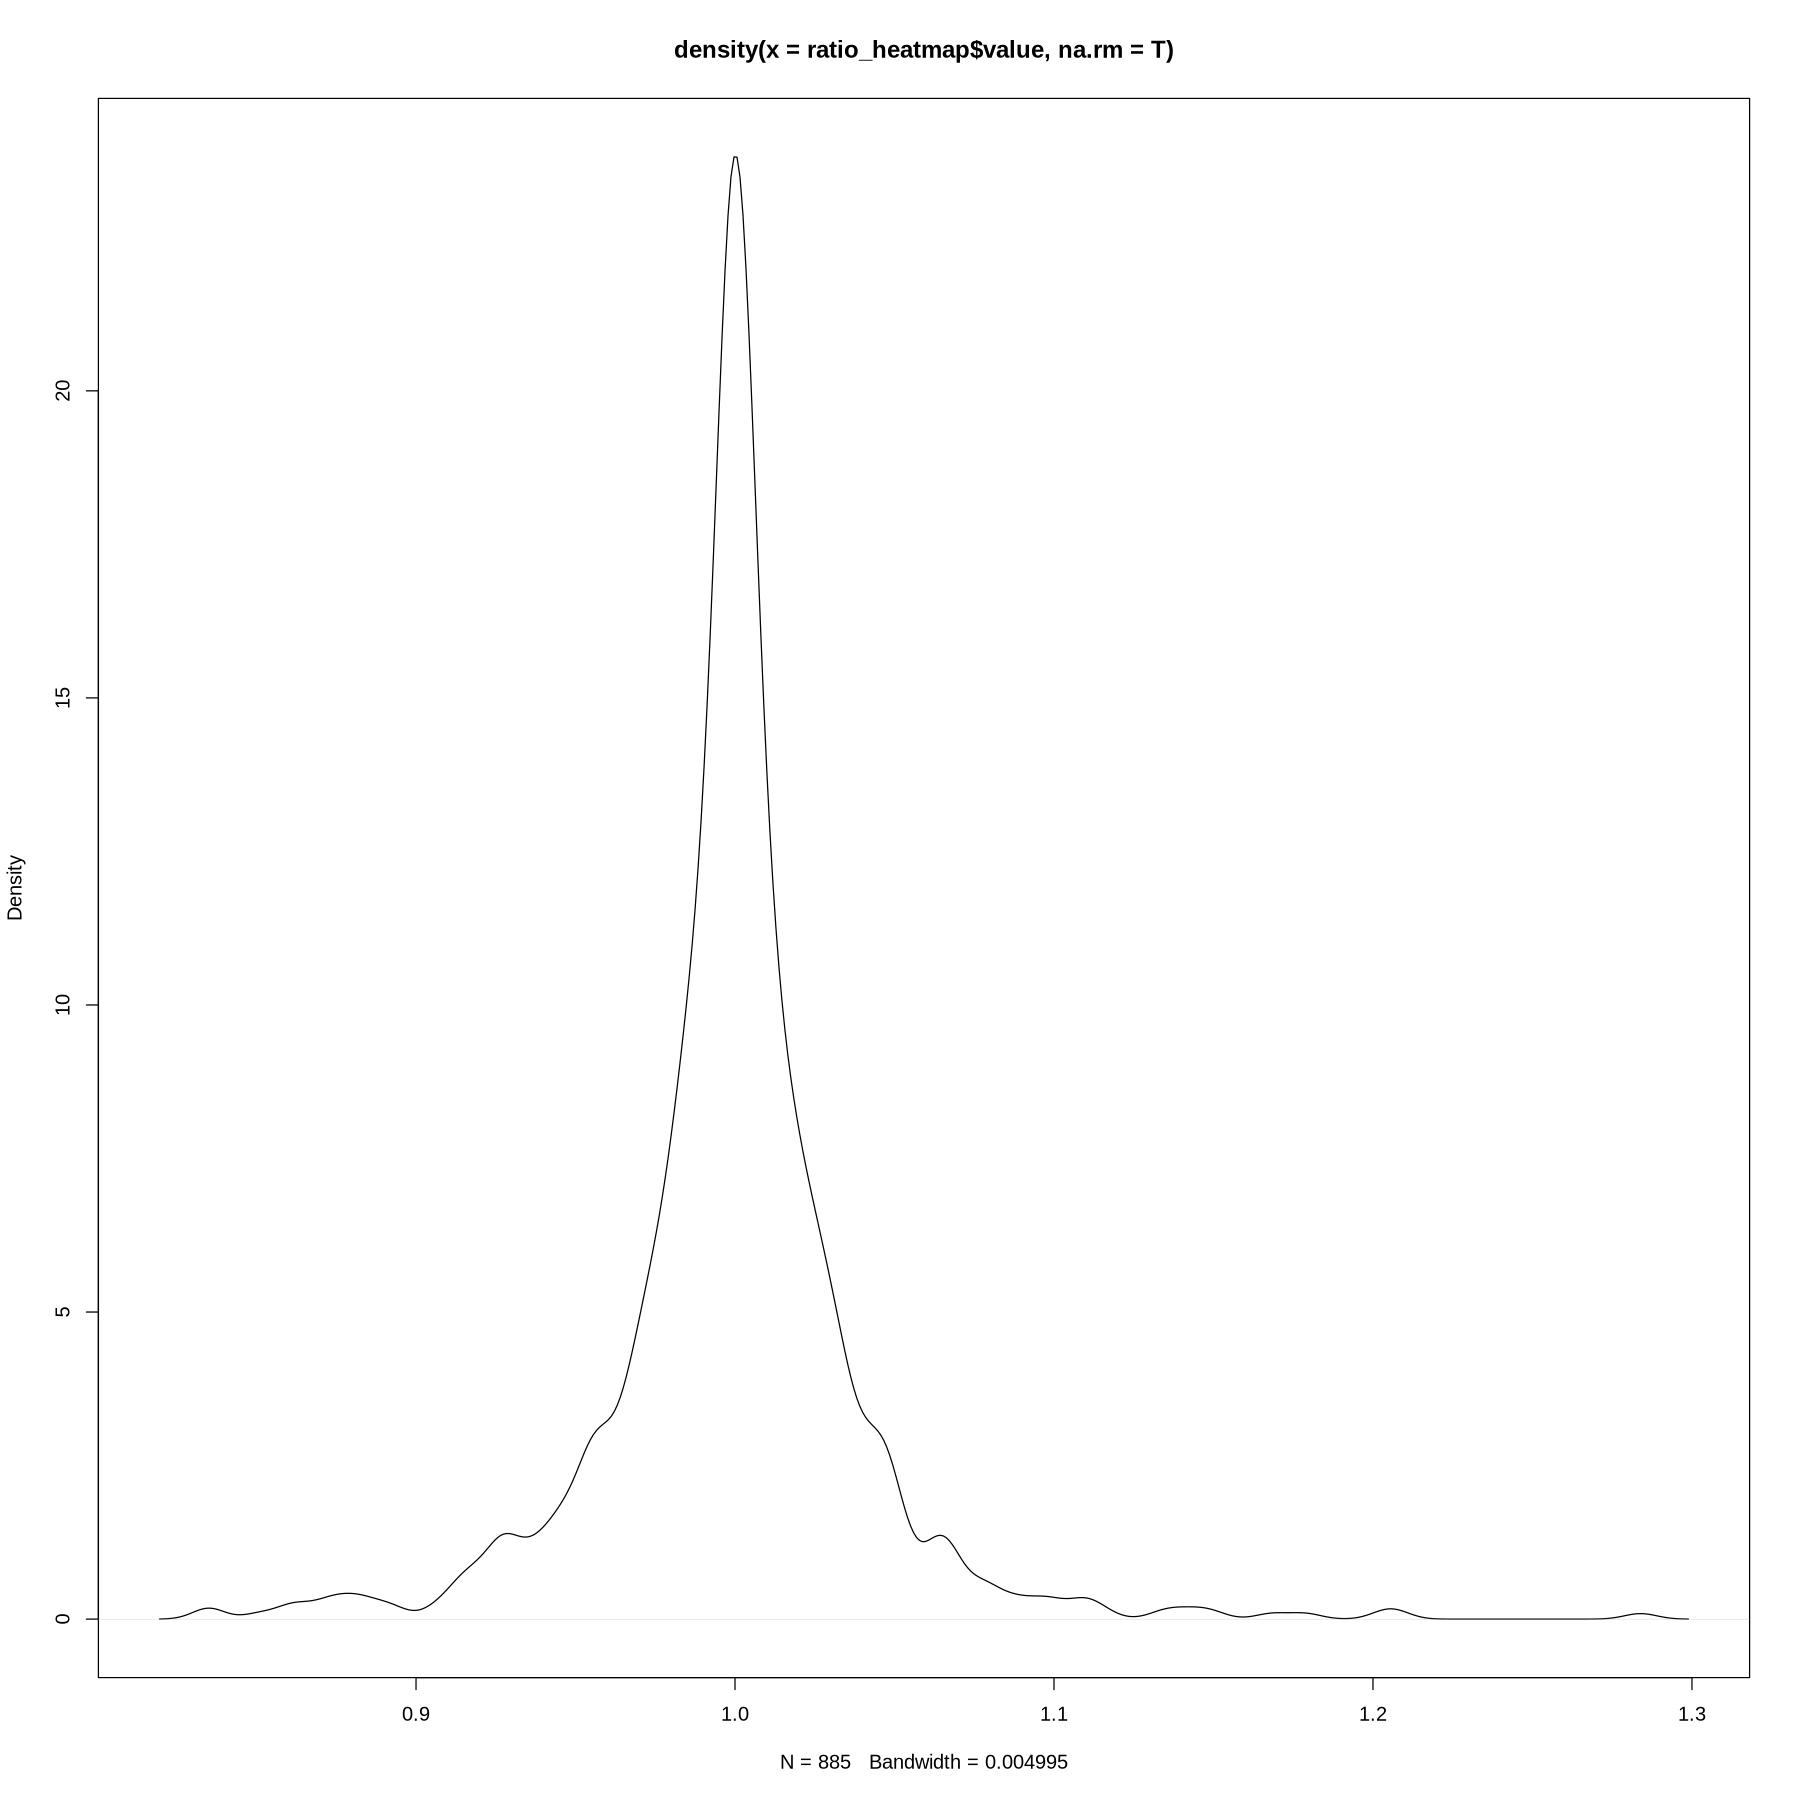

In [63]:
plot(density(ratio_heatmap$value,na.rm = T))

,Removed_Disease,Diseases,value
,<fct>,<fct>,<dbl>
1,Certain.infectious.and.parasitic.diseases,A71,1.0000000
2,Congenital.malformations..deformations.and.chromosomal.abnormalities,A71,1.0075059
3,Diseases.of.the.blood.and.blood.forming.organs.and.certain.disorders.involving.the.immune.mechanism,A71,0.9905488
4,Diseases.of.the.circulatory.system,A71,1.0240300
5,Diseases.of.the.digestive.system,A71,0.9910489
6,Diseases.of.the.genitourinary.system,A71,1.0854361


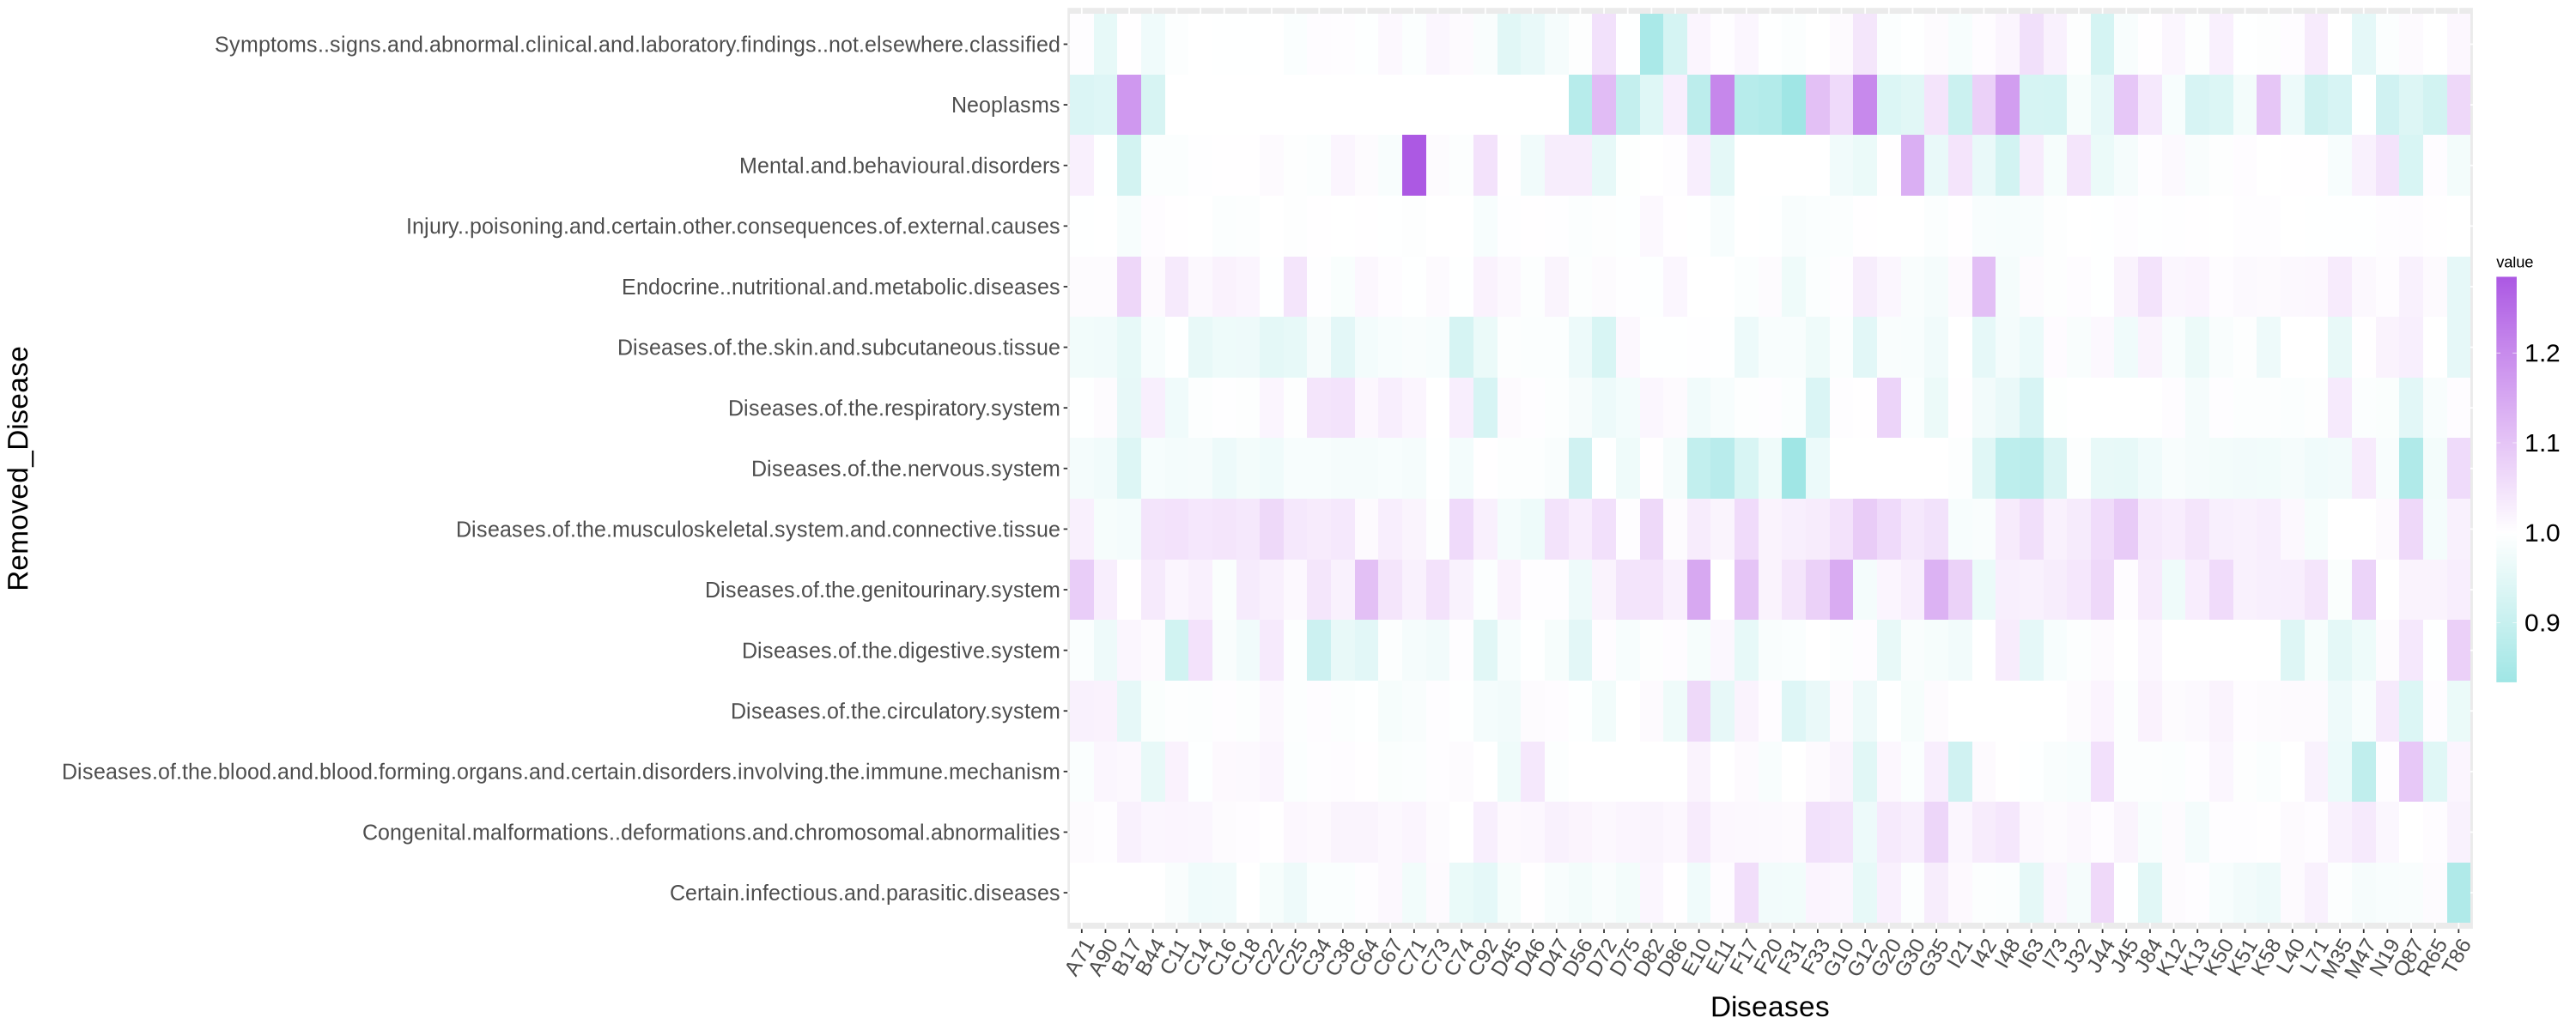

In [64]:
colnames(ratio_heatmap )[1:2] <- c('Removed_Disease','Diseases')
head(ratio_heatmap )


options(repr.plot.width=25, repr.plot.height=10)
ggplot(data = data.frame(ratio_heatmap), aes(x = Diseases, y = Removed_Disease, fill= value)) + 
    geom_tile() +
    #scale_fill_viridis_c(begin=0,end=1)+
    scale_fill_gradient2(midpoint = 1,low='#3ED3D3',mid='white',high='#AC59E3')+
    #scale_fill_gradientn(colors = hcl.colors(20, "RdYlGn"))+
    theme(axis.text.x = element_text(angle = 60, vjust = 1, hjust=1,size=15),
        axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0),size=20),
        axis.text.y = element_text( vjust = 0.5, hjust=1,size=15),
        axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0),size=20),
        legend.text = element_text(size=18),
        legend.key.size = unit(2, 'cm'),
        legend.key.width= unit(0.5, 'cm'),
        
    )

In [65]:
write.table(ratio_women_men,file='../RATIO_WOMEN_MEN_Disease_Category.tsv',row.names=T,col.names=T,sep='\t')

Disease vs Disease

In [66]:
# Read women & men RWR ratio matrices
rwr_by_disease_women <- read.table('../Plots/Women_Positive/Disease_vs_Removed_Disease_RWR_ratio.tsv',sep='\t') 
rwr_by_disease_men <- read.table('../Plots/Men_Positive/Disease_vs_Removed_Disease_RWR_ratio.tsv',sep='\t') 
rownames_to_use <- sort(intersect(rownames(rwr_by_disease_men),rownames(rwr_by_disease_women))) # Get set of shared diseases
rwr_by_disease_women <- 2^rwr_by_disease_women[rownames_to_use,rownames_to_use] #remove non intersecting diseases and remove log2 transform
rwr_by_disease_men <- 2^rwr_by_disease_men[rownames_to_use,rownames_to_use] #remove non intersecting diseases and remove log2 transform
head(rwr_by_disease_women)
dim(rwr_by_disease_women)
head(rwr_by_disease_men)
dim(rwr_by_disease_men)

,A71,A90,B17,B44,C11,C14,C16,C18,C22,C25,⋯,K51,K58,L40,L71,M35,M47,N19,Q87,R65,T86
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A71,1.000000,1.022836,1.001389,1.009234,1.009078,1.019341,1.017505,1.016757,1.011245,1.015859,⋯,1.020475,1.020307,1.032912,1.013067,1.0065572,1.011086,1.021015,1.001978,1.0185507,1.003753
A90,1.029343,1.000000,1.002729,1.008248,1.008185,1.015200,1.016015,1.014595,1.012331,1.012392,⋯,1.012617,1.012161,1.035509,1.011938,1.0063108,1.004738,1.021005,1.002096,0.9742567,1.002334
B17,1.004608,1.008607,1.000000,1.002502,1.045728,1.014665,1.024039,1.014523,1.035682,1.034370,⋯,1.006938,1.010188,1.010610,1.003380,0.9614151,1.001111,1.001443,1.005119,1.0060108,1.002942
B44,1.029150,1.019643,1.000891,1.000000,1.003405,1.010313,1.008731,1.013356,1.001532,1.010396,⋯,1.009745,1.011575,1.016768,1.012932,1.0163941,1.011658,1.015086,1.006044,0.9918292,1.006886
C11,1.012700,1.009489,1.009080,1.002802,1.000000,1.053539,1.030703,1.014682,1.017652,1.030768,⋯,1.020625,1.021427,1.020620,1.006279,1.0363419,1.001636,1.003594,1.002556,1.0046837,1.002652
C14,1.019061,1.012218,1.003996,1.004649,1.028307,1.000000,1.028314,1.031026,1.018405,1.024152,⋯,1.023586,1.024167,1.025314,1.009103,1.0166302,1.004500,1.006033,1.005939,1.0078974,1.002419


[1] 59 59

,A71,A90,B17,B44,C11,C14,C16,C18,C22,C25,⋯,K51,K58,L40,L71,M35,M47,N19,Q87,R65,T86
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A71,1.000000,1.015845,1.002788,1.001933,1.0113584,1.045502,1.012887,1.016326,1.013036,1.017494,⋯,1.025162,1.023423,1.028019,1.018958,1.011303,1.016342,1.011577,1.001545,1.015007,1.002614
A90,1.015162,1.000000,1.002456,1.009535,1.0101551,1.022019,1.013857,1.014447,1.011462,1.017535,⋯,1.016479,1.020227,1.023555,1.014651,1.008889,1.030969,1.019983,1.001390,1.020676,1.002676
B17,1.005377,1.004829,1.000000,1.004172,0.9799879,1.002634,1.003760,1.003888,1.003913,1.007639,⋯,1.003547,1.023805,1.003458,1.002685,1.002330,1.007476,1.003863,1.008222,1.005059,1.017674
B44,1.024784,1.021502,1.002194,1.000000,1.0035168,1.007328,1.005533,1.003021,1.007776,1.006650,⋯,1.007968,1.018505,1.019382,1.010932,1.005986,1.023371,1.025211,1.000877,1.021666,1.000964
C11,1.018838,1.017976,1.005325,1.001175,1.0000000,1.035846,1.042595,1.038147,1.025704,1.030130,⋯,1.024657,1.028315,1.026477,1.021534,1.005573,1.005602,1.003135,1.000843,1.008438,1.002883
C14,1.023696,1.015941,1.001709,1.004098,1.0130466,1.000000,1.025853,1.022820,1.020052,1.020992,⋯,1.024134,1.028244,1.028939,1.017660,1.005688,1.010491,1.002518,1.000692,1.009808,1.002047


[1] 59 59

In [67]:
ratio_disease_women_men <- rwr_by_disease_women / rwr_by_disease_men
head(ratio_disease_women_men)
colMeans(ratio_disease_women_men)

,A71,A90,B17,B44,C11,C14,C16,C18,C22,C25,⋯,K51,K58,L40,L71,M35,M47,N19,Q87,R65,T86
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A71,1.0000000,1.0068816,0.9986055,1.0072868,0.9977456,0.9749773,1.0045591,1.0004236,0.9982325,0.9983930,⋯,0.9954288,0.9969548,1.0047597,0.9942181,0.9953073,0.9948285,1.0093300,1.0004332,1.0034918,1.0011355
A90,1.0139690,1.0000000,1.0002720,0.9987254,0.9980502,0.9933275,1.0021283,1.0001461,1.0008601,0.9949452,⋯,0.9962011,0.9920945,1.0116783,0.9973262,0.9974445,0.9745576,1.0010017,1.0007058,0.9545209,0.9996596
B17,0.9992356,1.0037594,1.0000000,0.9983367,1.0670830,1.0119988,1.0202030,1.0105943,1.0316453,1.0265283,⋯,1.0033794,0.9866996,1.0071278,1.0006928,0.9591800,0.9936828,0.9975891,0.9969223,1.0009469,0.9855240
B44,1.0042607,0.9981804,0.9986998,1.0000000,0.9998883,1.0029634,1.0031797,1.0103035,0.9938042,1.0037212,⋯,1.0017626,0.9931963,0.9974354,1.0019788,1.0103466,0.9885545,0.9901235,1.0051622,0.9707957,1.0059157
C11,0.9939753,0.9916626,1.0037352,1.0016243,1.0000000,1.0170810,0.9885942,0.9773968,0.9921506,1.0006194,⋯,0.9960645,0.9933019,0.9942947,0.9850661,1.0305986,0.9960565,1.0004572,1.0017110,0.9962768,0.9997693
C14,0.9954724,0.9963351,1.0022825,1.0005485,1.0150639,1.0000000,1.0023996,1.0080224,0.9983851,1.0030951,⋯,0.9994647,0.9960344,0.9964761,0.9915917,1.0108802,0.9940716,1.0035063,1.0052428,0.9981075,1.0003717


A71       A90       B17       B44       C11       C14       C16       C18 
1.0049590 1.0005778 0.9997146 0.9966645 1.0057007 1.0058765 1.0019719 1.0013068 
      C22       C25       C34       C38       C64       C67       C71       C73 
1.0018791 1.0023059 0.9968581 0.9990423 0.9991922 0.9885204 0.9974633 0.9971837 
      C74       C92       D45       D46       D47       D56       D72       D75 
0.9986822 1.0027479 0.9957563 1.0018123 0.9970673 1.0003535 0.9976717 1.0027441 
      D82       D86       E10       E11       F17       F20       F31       F33 
0.9994805 0.9958279 0.9975240 0.9980537 1.0029880 1.0063851 1.0055685 1.0049472 
      G10       G12       G20       G30       G35       I21       I42       I48 
0.9882644 1.0034794 0.9920258 1.0010821 0.9931642 1.0020971 1.0015536 0.9961906 
      I63       I73       J32       J44       J45       J84       K12       K13 
1.0019191 0.9966509 1.0010221 0.9938284 0.9983478 0.9963306 0.9988574 0.9968182 
      K50       K51       K58       L40       L71       M35       M47       N19 
1.0000346 1.0030805 0.9974012 1.0008443 0.9956783 1.0060208 0.9927287 1.0049579 
      Q87       R65       T86 
0.9997137 0.9956886 0.9985559

In [68]:
ratio_disease_heatmap <- melt(t(ratio_disease_women_men))
head(ratio_disease_heatmap)

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,A71,A71,1.0000000
2,A90,A71,1.0068816
3,B17,A71,0.9986055
4,B44,A71,1.0072868
5,C11,A71,0.9977456
6,C14,A71,0.9749773


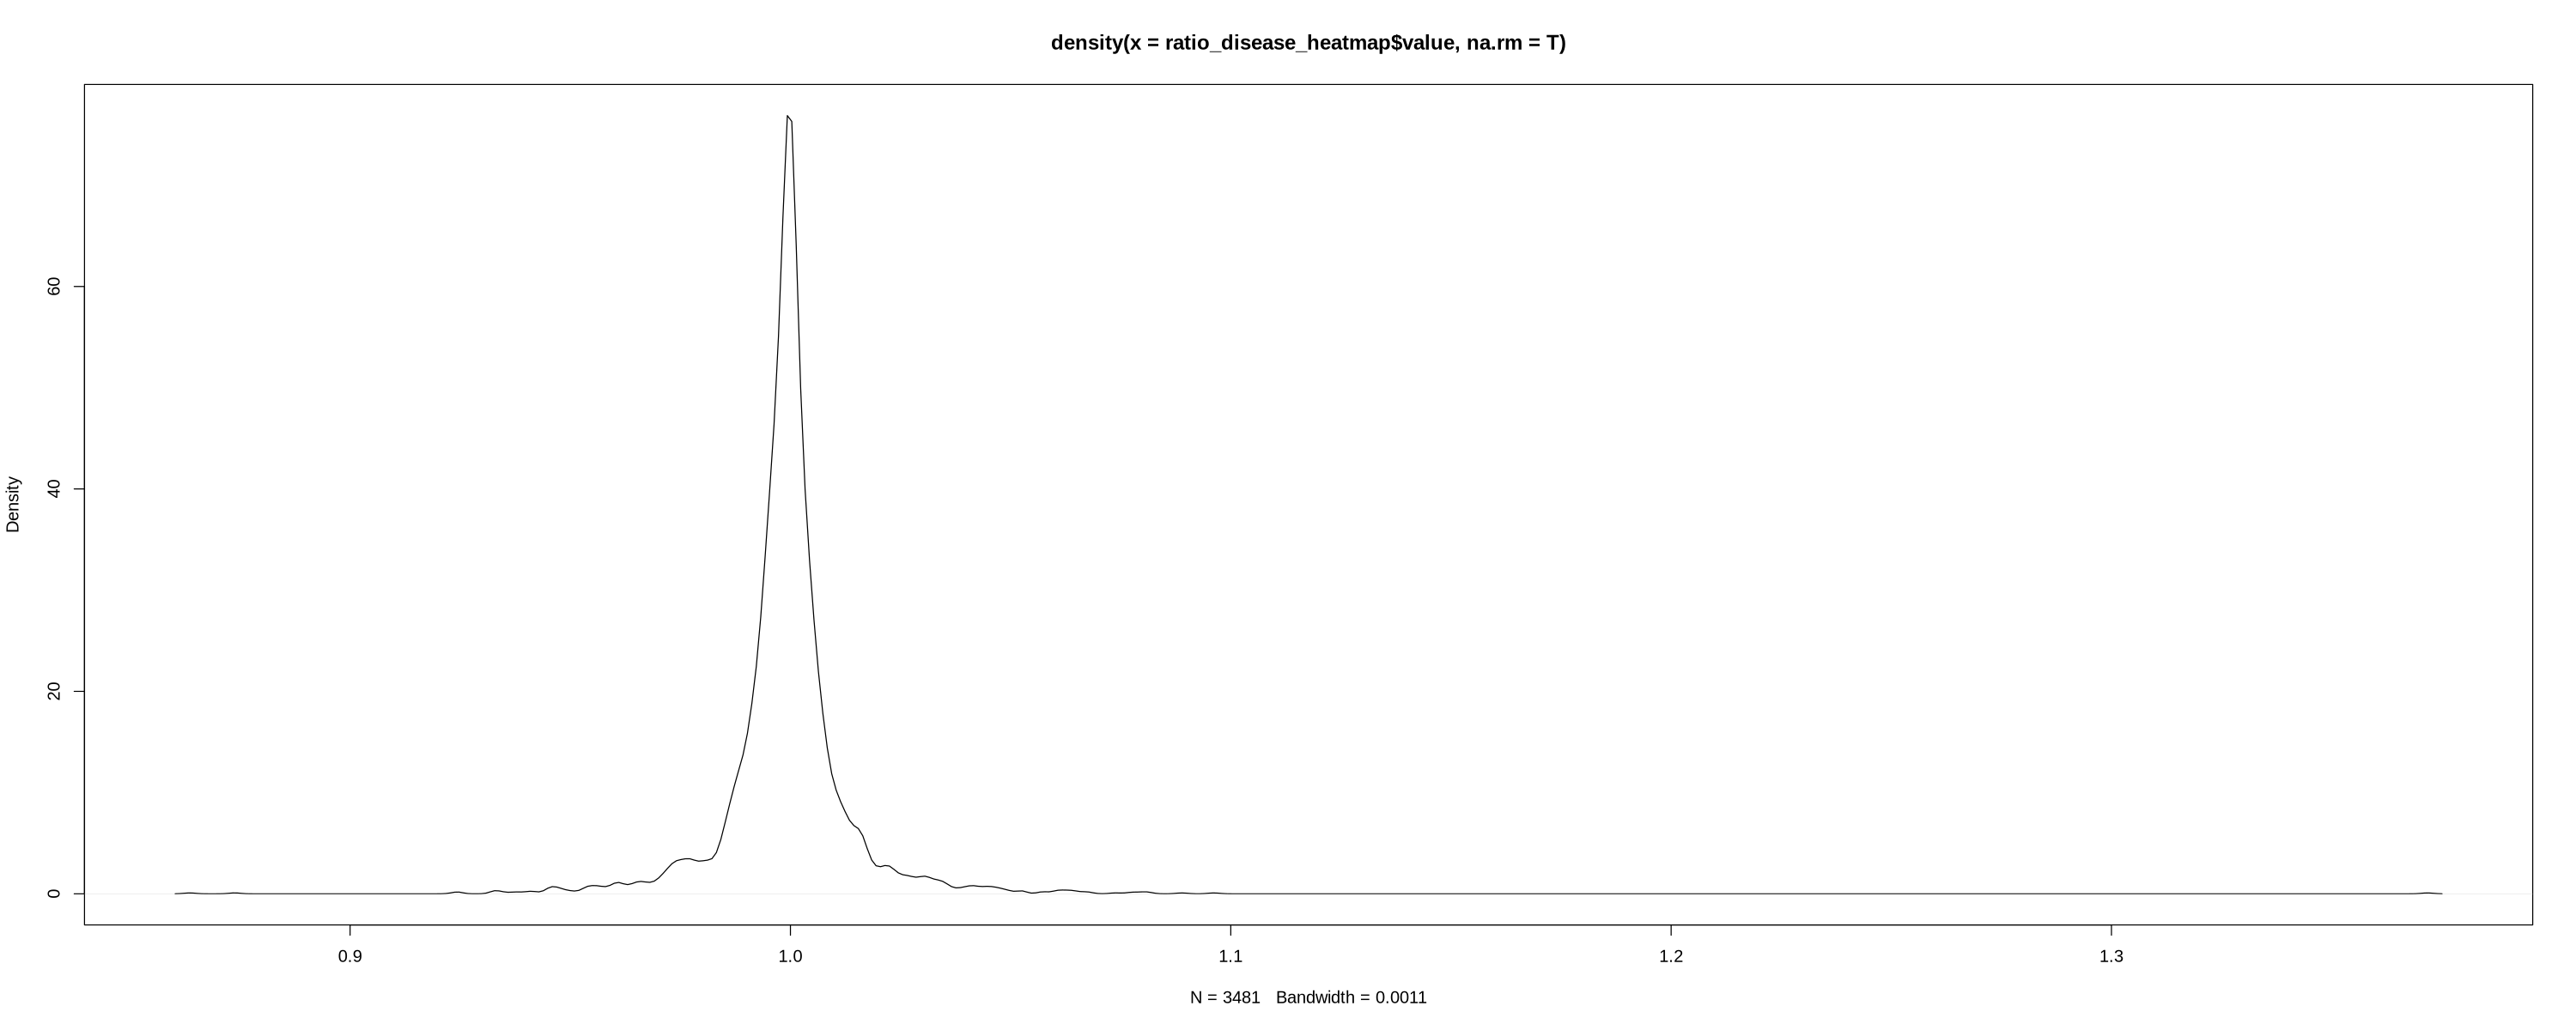

In [69]:
plot(density(ratio_disease_heatmap$value,na.rm = T))

In [70]:
c(quantile(ratio_disease_heatmap$value,0.01),quantile(ratio_disease_heatmap$value,0.99))

1%       99% 
0.9557351 1.0447257

In [71]:
library(RColorBrewer)

In [72]:
library(parallelDist)
fun_cor <- function(x){
    return(parallelDist::parallelDist(x,method = 'mahalanobis'))
}

,Removed_Disease,Diseases,value
,<fct>,<fct>,<dbl>
1,A71,A71,1.0000000
2,A90,A71,1.0068816
3,B17,A71,0.9986055
4,B44,A71,1.0072868
5,C11,A71,0.9977456
6,C14,A71,0.9749773


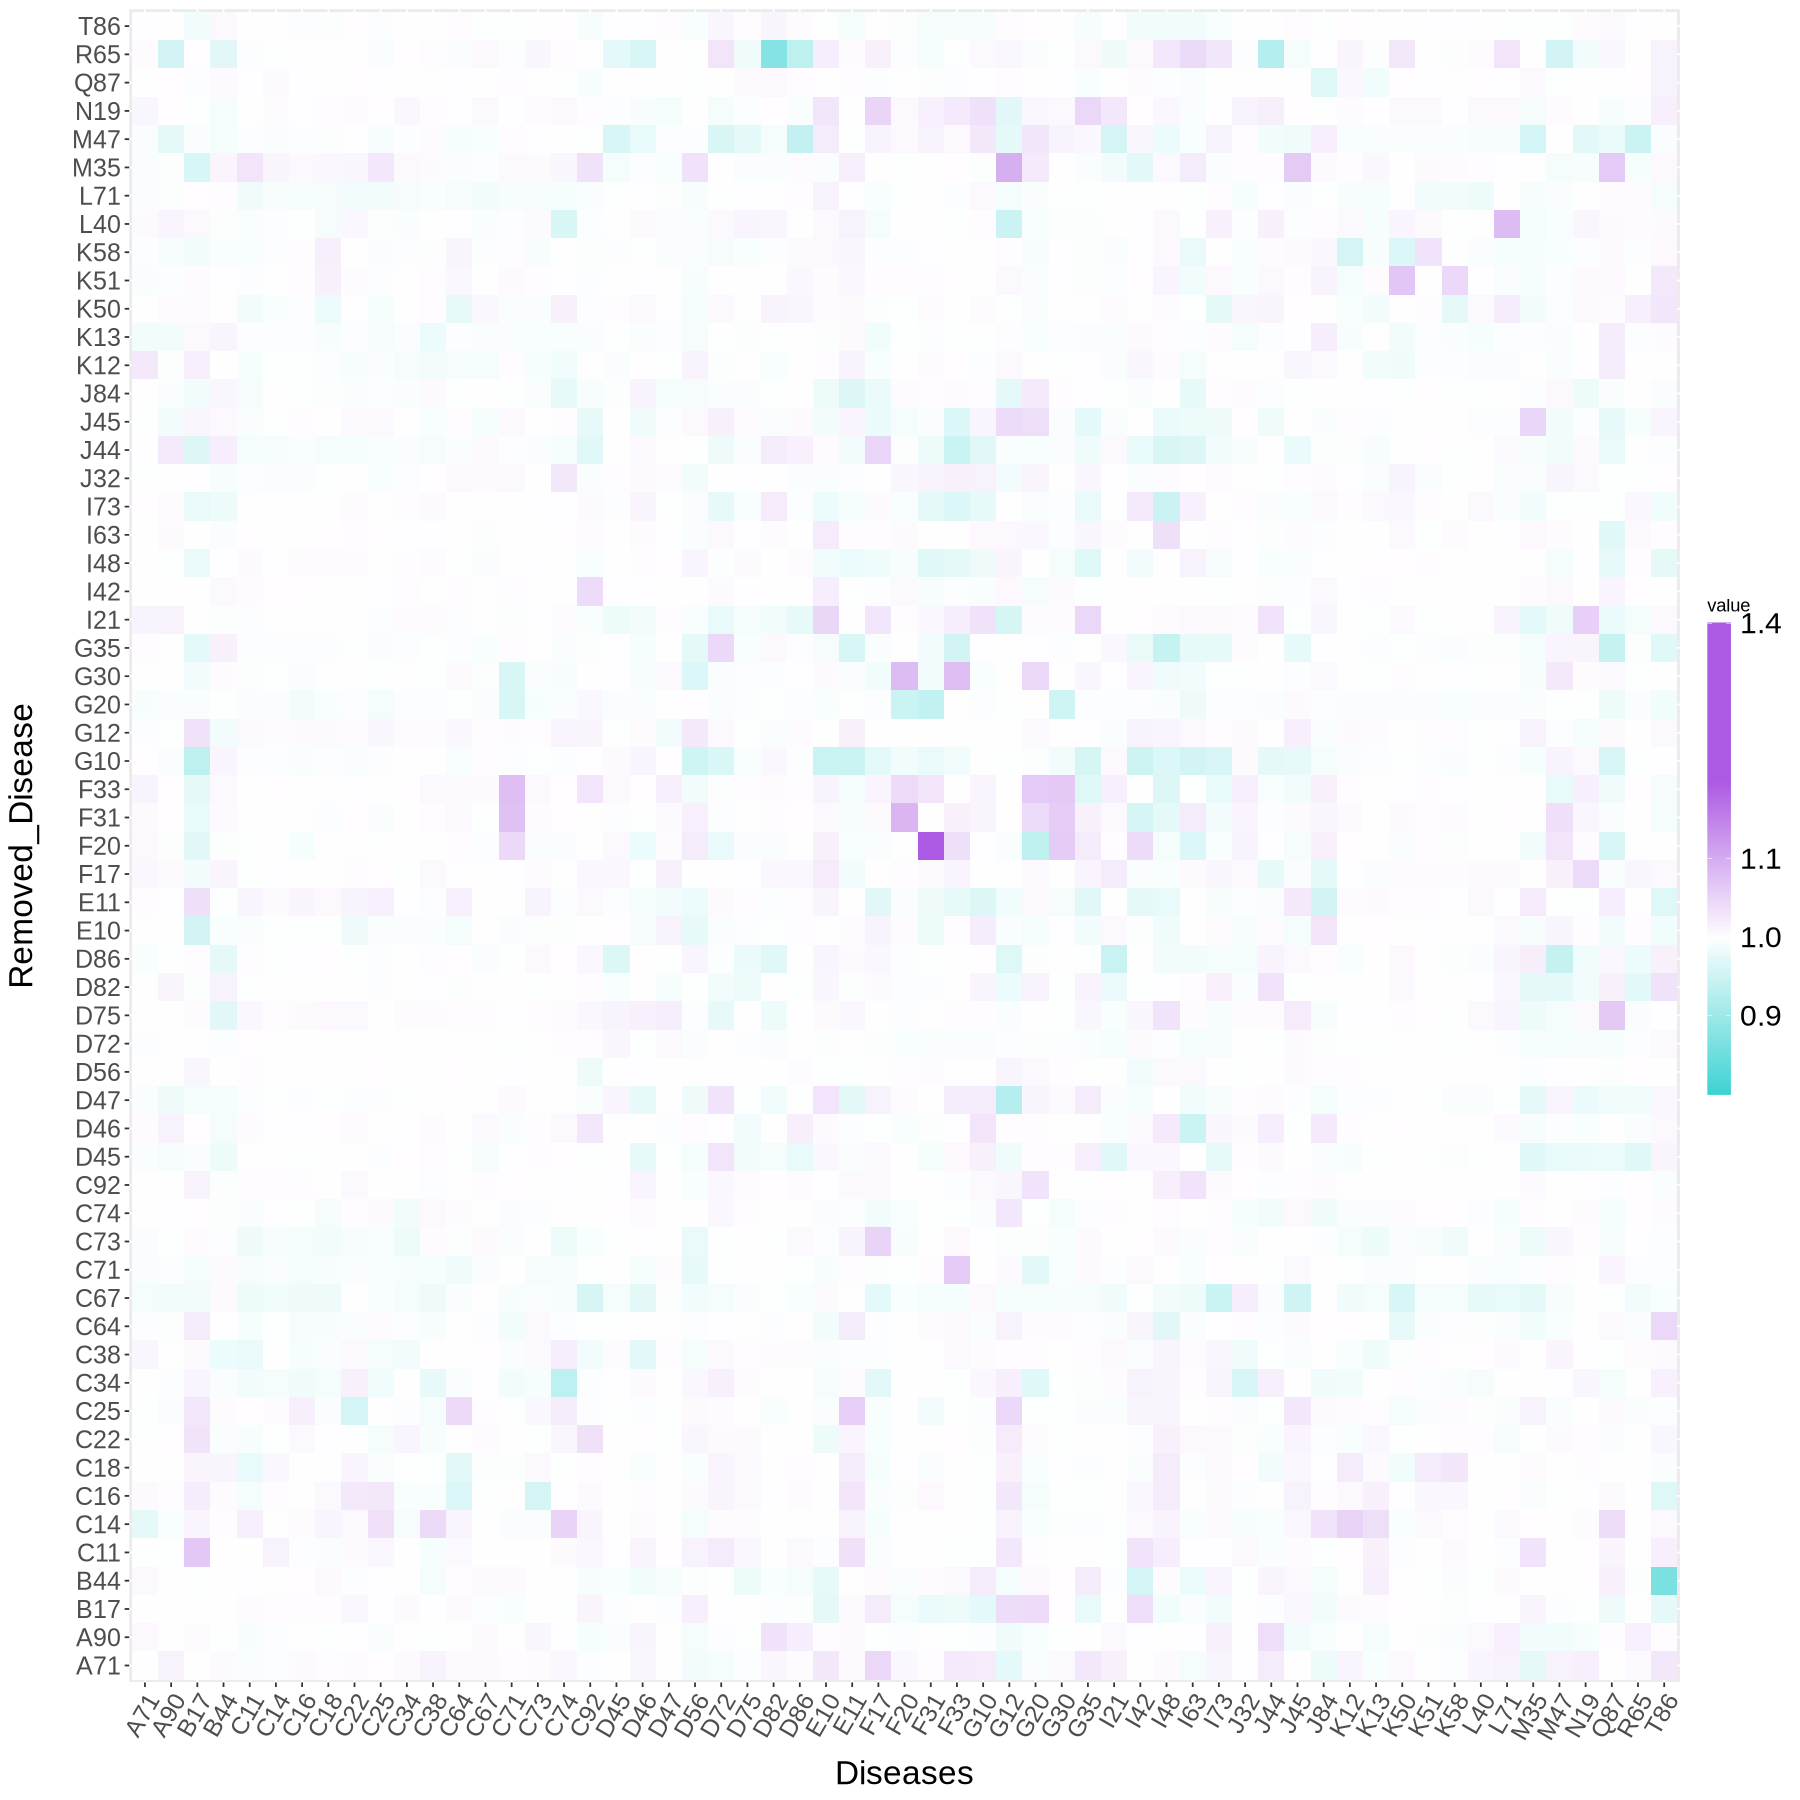

In [73]:
colnames(ratio_disease_heatmap )[1:2] <- c('Removed_Disease','Diseases')
head(ratio_disease_heatmap)


options(repr.plot.width=15, repr.plot.height=15)
ggplot(data = data.frame(ratio_disease_heatmap), aes(x = Diseases, y = Removed_Disease, fill= value)) + 
    geom_tile() +
    #scale_fill_viridis_c(begin=1,end=0)+
    #scale_fill_viridis_b(breaks=c(0.9,1,1.1,1.2,1.3))+
    #scale_fill_gradientn(colors = hcl.colors(50, "PRGn"),limits=c(quantile(ratio_disease_heatmap$value,0.01),quantile(ratio_disease_heatmap$value,0.999)))+
    scale_fill_gradientn(colours = colorRampPalette(c('#3ED3D3', 'white','#AC59E3', '#AC59E3'))(100),breaks=c(0.9,1,1.1,1.4),limits=c(0.8, 1.4))+ #For visualization
    #scale_fill_gradient2(midpoint = 1,low='#3ED3D3',mid='white',high='#AC59E3')+
    theme(axis.text.x = element_text(angle = 60, vjust = 1, hjust=1,size=15),
        axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0),size=20),
        axis.text.y = element_text( vjust = 0.5, hjust=1,size=15),
        axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0),size=20),
        legend.text = element_text(size=18),
        legend.key.size = unit(2, 'cm'),
        legend.key.width= unit(0.5, 'cm'),
        
    )

In [74]:
write.table(ratio_disease_women_men,file='../RATIO_WOMEN_MEN_By_Disease.tsv',row.names=T,col.names=T,sep='\t')

In [68]:
############################################### INDEPENDENT RUN ############################################################################

# Same Analysis removing each layer

In [66]:
print(sex) #Print current Sex for generation for data frame production

[1] "men"


In [67]:
#Generate the new_multilayer

comorbidity_networks_keep <- comorbidity_networks

In [68]:
length(names(comorbidity_networks_keep))

[1] 29

In [69]:
names(comorbidity_networks_keep) <- unlist(lapply(strsplit(names(comorbidity_networks_keep),'_ICD10'),function(x) x[1]))

# ~ 120 min Run (AsRock Machine)

In [70]:
for(k in 1:length(comorbidity_networks_keep)){
    message(paste0('Removing layer ',names(comorbidity_networks_keep)[k]))
    removed_disease_name <- paste0(names(comorbidity_networks_keep)[k],'_removed_layer_')
    comorbidity_networks <- comorbidity_networks_keep[-k] # Remove layer
    gr_union <- Reduce(igraph::union,comorbidity_networks) # Temporal layer union object
    id_tab <- data.frame(1:length(names(V(gr_union))),names(V(gr_union))) # Temporal id_tab object
    colnames(id_tab) <- c('node_id','name')
    
    # Temporal Reference Multilayer Network
    Multiplex_Comorbidity <- create.multiplex(LayersList = comorbidity_networks) # Temporal Reference Multilayer Network
    # Create and Normalize SupraAdjacencyMatrix
    AdjMatrix_Comor <- compute.adjacency.matrix(Multiplex_Comorbidity) 
    AdjMatrixNorm_Comor <- normalize.multiplex.adjacency(AdjMatrix_Comor)

    # Recursive analysis by Disease class
        message(paste0('Starting analysis by Disease Class at ',Sys.time()))
        list_diff_per_category <- list()
        for(i in 1:length(list_disease_types)){
            categoria_a_eliminar <- list_disease_types[[i]]
            temp_all_reference_RWR <- mclapply(list_disease_types, function(x) reference_RWR(source_category = categoria_a_eliminar,target_category = x),mc.cores = n_cores_use)
            nuevo_multilayer <- remove_category_from_multiplex(source_category = categoria_a_eliminar)
            temp_all_removed_RWR <- mclapply(list_disease_types, function(x) reference_RWR_removed_nodes(x,multiplex_network = nuevo_multilayer),mc.cores = n_cores_use)
            temp_cus <- get_RWR_diff(original_rwr = temp_all_reference_RWR,removed_rwr = temp_all_removed_RWR)
            list_diff_per_category[[i]] <- temp_cus
            #message(i)
        }
        names(list_diff_per_category) <- names(list_disease_types)
    
        # Plot Required Code
        list_diff_per_category <- mclapply(list_diff_per_category,function(y) Reduce(rbind,mclapply(y,function(x) t(data.frame(as.list(x))),mc.cores = n_cores_use)), mc.cores = n_cores_use)

        disease_vs_removed_category <- Reduce(cbind,list_diff_per_category)
        colnames(disease_vs_removed_category) <- names(list_diff_per_category)

        # Heatmap

        disease_vs_removed_category_heatmap <- melt(t(scale(disease_vs_removed_category))) #Scale values per removed disease

        colnames(disease_vs_removed_category_heatmap)[1:2] <- c('Removed_Disease_Category','Diseases')
        head(disease_vs_removed_category_heatmap)
        
        # Write Input values
        write.table(disease_vs_removed_category,file=paste0(out,removed_disease_name,'Disease_vs_Removed_Category_RWR_ratio.tsv'),sep='\t')

        # Save Plot
        #png(file=paste0(out,removed_disease_name,'Disease_vs_Removed_Category_Scaled_RWR_ratio.png'),width = 1920,height = 1080)
        ggplot(data = data.frame(disease_vs_removed_category_heatmap), aes(x = Diseases, y = Removed_Disease_Category, fill= value)) + 
        geom_tile() +
        ggtitle(paste0("Effect of removed disease category in RWR affinity score for ",sex," Reactome Comorbidity Multilayer Network"))+
        scale_fill_viridis_c(begin=0,end=1)+
        theme(
        plot.title = element_text(family = "Montserrat", size = (20)),
        axis.text.x = element_text(angle = 60, vjust = 1, hjust=1,size=15),
        axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0),size=20),
        axis.text.y = element_text( vjust = 0.5, hjust=1,size=15),
        axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0),size=20),
        legend.text = element_text(size=18),
        legend.key.size = unit(2, 'cm'),
        legend.key.width= unit(0.5, 'cm'),
        )
        ggsave(file=paste0(out,removed_disease_name,'Disease_vs_Removed_Category_Scaled_RWR_ratio.png'), width = 30, height = 15, dpi = 300)
        #dev.off()
        message(paste0('Finished analysis by Disease Class at ',Sys.time()))

    # Recursive Analysis by Disease
        list_diseases <- as.list(names(V(gr_union)))
        names(list_diseases) <- list_diseases
        head(list_diseases)

        list_diff_per_category <- list()
        #temp_reference_RWR <- lapply(list_diseases, reference_RWR)

        message(paste0('Starting analysis by individual diseases at ',Sys.time()))
        for(i in 1:length(list_diseases)){
        #for(i in 1:2){
            categoria_a_eliminar <- list_diseases[[i]]
            temp_all_reference_RWR <- mclapply(list_diseases, function(x) reference_RWR(source_category = categoria_a_eliminar,target_category = x),mc.cores = n_cores_use)
            nuevo_multilayer <- remove_category_from_multiplex(source_category = categoria_a_eliminar)
            temp_all_removed_RWR <- mclapply(list_diseases, function(x) reference_RWR_removed_nodes(x,multiplex_network = nuevo_multilayer),mc.cores = n_cores_use)
            temp_cus <- get_RWR_diff(original_rwr = temp_all_reference_RWR,removed_rwr = temp_all_removed_RWR)
            list_diff_per_category[[i]] <- temp_cus
            #message(i)
        }
        names(list_diff_per_category) <- names(list_diseases)

        list_diff_per_category_2 <- mclapply(list_diff_per_category, function(y) Reduce(rbind,mclapply(y,function(x) t(data.frame(as.list(x))),mc.cores = n_cores_use)),    mc.cores = n_cores_use)
        
        # Plot Required Code
        disease_vs_removed_category <- Reduce(cbind,list_diff_per_category_2)
        colnames(disease_vs_removed_category) <- names(list_diff_per_category_2)
        included <- color_tab$ICD10[color_tab$ICD10 %in% row.names(disease_vs_removed_category)]

        disease_vs_removed_category_heatmap <- melt(t(scale(disease_vs_removed_category[included,included]))) #Scale values per removed disease

        colnames(disease_vs_removed_category_heatmap)[1:2] <- c('Removed_Disease','Diseases')
        head(disease_vs_removed_category_heatmap)

        write.table(disease_vs_removed_category,file=paste0(out,removed_disease_name,'Disease_vs_Removed_Disease_RWR_ratio.tsv'),sep='\t') # Save matrix

        #Save Plot
        #png(file=paste0(out,'Disease_vs_Removed_Disease_Scaled_RWR_ratio.png'),width = 1920,height = 1430)
        ggplot(data = data.frame(disease_vs_removed_category_heatmap), aes(x = Diseases, y = Removed_Disease, fill= value)) + 
        geom_tile() +
        ggtitle(paste0("Effect of removed disease in RWR affinity score for ",sex," Reactome Comorbidity Multilayer Network"))+
        scale_fill_viridis_c(begin=0,end=1)+
        theme(
        plot.title = element_text(family = "Montserrat", size = (25)),
        axis.text.x = element_text(angle = 60, vjust = 1, hjust=1,size=15),
        axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0),size=20),
        axis.text.y = element_text( vjust = 0.5, hjust=1,size=15),
        axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0),size=20),
        legend.text = element_text(size=18),
        legend.key.size = unit(2, 'cm'),
        legend.key.width= unit(0.5, 'cm')  
        )
        #dev.off() 
        ggsave(file=paste0(out,removed_disease_name,'Disease_vs_Removed_Disease_Scaled_RWR_ratio.png'), width = 20, height = 20, dpi = 300)
        message(paste0('Finished analysis by individual diseases at ',Sys.time()))
}

Removing layer Autophagy

Starting analysis by Disease Class at 2024-04-29 17:02:34.718105

Finished analysis by Disease Class at 2024-04-29 17:03:07.899551

Starting analysis by individual diseases at 2024-04-29 17:03:07.901301

Finished analysis by individual diseases at 2024-04-29 17:06:27.41418

Removing layer Cell_Cycle

Starting analysis by Disease Class at 2024-04-29 17:06:29.085393

Finished analysis by Disease Class at 2024-04-29 17:07:01.548269

Starting analysis by individual diseases at 2024-04-29 17:07:01.549849

Finished analysis by individual diseases at 2024-04-29 17:10:26.04524

Removing layer Cell-Cell_communication

Starting analysis by Disease Class at 2024-04-29 17:10:27.566403

Finished analysis by Disease Class at 2024-04-29 17:11:00.397928

Starting analysis by individual diseases at 2024-04-29 17:11:00.399652

Finished analysis by individual diseases at 2024-04-29 17:14:20.829178

Removing layer Cellular_responses_to_stimuli

Starting analysis by Disease Class 

In [71]:
length(comorbidity_networks_keep)

[1] 29

In [ ]:
################################################# INDEPENDENT RUN #################################################################################

#### Men vs Women By Removed Layer

In [75]:
getwd()

[1] "/media/inunez/4tb/BSC_Machine_January_24/Desktop/Sex_Comorbidities/Sex_Comorbidities/Men"

In [76]:
setwd('../')

Removed Disease Category vs Disease

In [92]:
# Men Files
men_files <- paste0('Plots/Men_Positive/',list.files('Plots/Men_Positive')[grep('Removed_Category_RWR_ratio.tsv',list.files('Plots/Men_Positive'))])
men_files <- men_files[-9]
men_files
length(men_files)

[1] "Plots/Men_Positive/Autophagy_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                           
 [2] "Plots/Men_Positive/Cell_Cycle_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                          
 [3] "Plots/Men_Positive/Cell-Cell_communication_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"             
 [4] "Plots/Men_Positive/Cellular_responses_to_stimuli_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"       
 [5] "Plots/Men_Positive/Chromatin_organization_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"              
 [6] "Plots/Men_Positive/Circadian_Clock_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                     
 [7] "Plots/Men_Positive/Developmental_Biology_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"               
 [8] "Plots/Men_Positive/Disease_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                             
 [9] "Plots/Men_Positive/DNA_Repair_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                          
[10] "Plots/Men_Positive/DNA_Replication_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                     
[11] "Plots/Men_Positive/Drug_ADME_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                           
[12] "Plots/Men_Positive/Extracellular_matrix_organization_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"   
[13] "Plots/Men_Positive/Gene_expression_Transcription_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"       
[14] "Plots/Men_Positive/Hemostasis_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                          
[15] "Plots/Men_Positive/Immune_System_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                       
[16] "Plots/Men_Positive/Metabolism_of_proteins_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"              
[17] "Plots/Men_Positive/Metabolism_of_RNA_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                   
[18] "Plots/Men_Positive/Metabolism_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                          
[19] "Plots/Men_Positive/Mitochondria_All_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                    
[20] "Plots/Men_Positive/Muscle_contraction_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                  
[21] "Plots/Men_Positive/Neuronal_System_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                     
[22] "Plots/Men_Positive/Organelle_biogenesis_and_maintenance_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"
[23] "Plots/Men_Positive/Programmed_Cell_Death_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"               
[24] "Plots/Men_Positive/Protein_localization_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                
[25] "Plots/Men_Positive/Reproduction_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                        
[26] "Plots/Men_Positive/Sensory_Perception_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                  
[27] "Plots/Men_Positive/Signal_Transduction_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                 
[28] "Plots/Men_Positive/Transport_of_small_molecules_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"        
[29] "Plots/Men_Positive/Vesicle-mediated_transport_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"

[1] 29

In [93]:
#Women Files
women_files <- paste0('Plots/Women_Positive/',list.files('Plots/Women_Positive')[grep('Removed_Category_RWR_ratio.tsv',list.files('Plots/Women_Positive'))])
women_files <- women_files[-9]
women_files
length(women_files)

[1] "Plots/Women_Positive/Autophagy_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                           
 [2] "Plots/Women_Positive/Cell_Cycle_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                          
 [3] "Plots/Women_Positive/Cell-Cell_communication_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"             
 [4] "Plots/Women_Positive/Cellular_responses_to_stimuli_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"       
 [5] "Plots/Women_Positive/Chromatin_organization_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"              
 [6] "Plots/Women_Positive/Circadian_Clock_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                     
 [7] "Plots/Women_Positive/Developmental_Biology_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"               
 [8] "Plots/Women_Positive/Disease_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                             
 [9] "Plots/Women_Positive/DNA_Repair_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                          
[10] "Plots/Women_Positive/DNA_Replication_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                     
[11] "Plots/Women_Positive/Drug_ADME_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                           
[12] "Plots/Women_Positive/Extracellular_matrix_organization_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"   
[13] "Plots/Women_Positive/Gene_expression_Transcription_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"       
[14] "Plots/Women_Positive/Hemostasis_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                          
[15] "Plots/Women_Positive/Immune_System_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                       
[16] "Plots/Women_Positive/Metabolism_of_proteins_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"              
[17] "Plots/Women_Positive/Metabolism_of_RNA_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                   
[18] "Plots/Women_Positive/Metabolism_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                          
[19] "Plots/Women_Positive/Mitochondria_All_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                    
[20] "Plots/Women_Positive/Muscle_contraction_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                  
[21] "Plots/Women_Positive/Neuronal_System_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                     
[22] "Plots/Women_Positive/Organelle_biogenesis_and_maintenance_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"
[23] "Plots/Women_Positive/Programmed_Cell_Death_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"               
[24] "Plots/Women_Positive/Protein_localization_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                
[25] "Plots/Women_Positive/Reproduction_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                        
[26] "Plots/Women_Positive/Sensory_Perception_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                  
[27] "Plots/Women_Positive/Signal_Transduction_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"                 
[28] "Plots/Women_Positive/Transport_of_small_molecules_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"        
[29] "Plots/Women_Positive/Vesicle-mediated_transport_removed_layer_Disease_vs_Removed_Category_RWR_ratio.tsv"

[1] 29

In [94]:
library(igraph)
library(parallel)
library(reshape2)
library(ggplot2)
n_cores_use <- 4

In [95]:
men_files <- mclapply(as.list(men_files),function(x) read.table(x,header=T,sep='\t'))
women_files <- mclapply(as.list(women_files),function(x) read.table(x,header=T,sep='\t'))

In [96]:
names_women <- lapply(strsplit(list.files('Plots/Women_Positive')[grep('Removed_Category_RWR_ratio.tsv',list.files('Plots/Women_Positive'))],'_removed_layer'),function(x) x[1])[-9]
names(women_files) <- names_women
names_men <- lapply(strsplit(list.files('Plots/Men_Positive')[grep('Removed_Category_RWR_ratio.tsv',list.files('Plots/Men_Positive'))],'_removed_layer'),function(x) x[1])[-9]
names(men_files) <- names_men

In [97]:
ratio_calculation_per_category <- function(women_tab,men_tab,layer){
   rwr_by_category_women <- women_tab[[layer]]
   rwr_by_category_men <- men_tab[[layer]]
   rownames_to_use <- sort(intersect(rownames(rwr_by_category_men),rownames(rwr_by_category_women))) # Get set of shared diseases
   rwr_by_category_women <- 2^rwr_by_category_women[rownames_to_use,] #remove non intersecting diseases and remove log2 transform
   rwr_by_category_men <- 2^rwr_by_category_men[rownames_to_use,] #remove non intersecting diseases and remove log2 transform
   ratio_women_men <- rwr_by_category_women / rwr_by_category_men

   ori_ratio_women_men_by_disease_group <- read.table('RATIO_WOMEN_MEN_Disease_Category.tsv')

   ratio_heatmap <- melt(t(ratio_women_men-ori_ratio_women_men_by_disease_group))
   
   colnames(ratio_heatmap )[1:2] <- c('Removed_Disease','Diseases')
   head(ratio_heatmap )

   options(repr.plot.width=25, repr.plot.height=10)
   ploti <- ggplot(data = data.frame(ratio_heatmap), aes(x = Diseases, y = Removed_Disease, fill= value)) + 
       geom_tile() +
       ggtitle(paste0("Effect of removing ",layer," layer from the Reactome Multilayer Network on the Women/Men RWR Ratio"))+
      #scale_fill_viridis_c(begin=0,end=1)+
      #scale_fill_gradientn(colours = colorRampPalette(c('#3ED3D3', 'white','#AC59E3', '#AC59E3'))(100),breaks=c(-0.1,-0.05,0,0.05,0.1),limits=c(-0.15,0.15),midpoint=0)+ #For visualization
      #scale_fill_gradient2(midpoint = 0,low='#3ED3D3',mid='white',high='#AC59E3',breaks=c(-0.1,-0.05,0,0.05,0.1),limits=c(-0.1,0.1),oob = scales::squish)+ #Squish puts one instance outside this limits inside. 
      scale_fill_gradient2(midpoint = 0,low='#009e73',mid='white',high='#d55e00',breaks=c(-0.1,-0.05,0,0.05,0.1),limits=c(-0.1,0.1),oob = scales::squish)+ #Squish puts one instance outside this limits inside. 
      #scale_fill_gradientn(colors = hcl.colors(20, "RdYlGn"))+
      theme(axis.text.x = element_text(angle = 60, vjust = 1, hjust=1,size=15),
        plot.title = element_text(family = "Montserrat", size = (18)),
        axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0),size=20),
        axis.text.y = element_text( vjust = 0.5, hjust=1,size=15),
        axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0),size=20),
        legend.text = element_text(size=18),
        legend.key.size = unit(2, 'cm'),
        legend.key.width= unit(0.5, 'cm')
    )

res <- list(ratio_women_men,ploti)    
}

In [98]:
names(women_files)

[1] "Autophagy"                           
 [2] "Cell_Cycle"                          
 [3] "Cell-Cell_communication"             
 [4] "Cellular_responses_to_stimuli"       
 [5] "Chromatin_organization"              
 [6] "Circadian_Clock"                     
 [7] "Developmental_Biology"               
 [8] "Disease"                             
 [9] "DNA_Repair"                          
[10] "DNA_Replication"                     
[11] "Drug_ADME"                           
[12] "Extracellular_matrix_organization"   
[13] "Gene_expression_Transcription"       
[14] "Hemostasis"                          
[15] "Immune_System"                       
[16] "Metabolism_of_proteins"              
[17] "Metabolism_of_RNA"                   
[18] "Metabolism"                          
[19] "Mitochondria_All"                    
[20] "Muscle_contraction"                  
[21] "Neuronal_System"                     
[22] "Organelle_biogenesis_and_maintenance"
[23] "Programmed_Cell_Death"               
[24] "Protein_localization"                
[25] "Reproduction"                        
[26] "Sensory_Perception"                  
[27] "Signal_Transduction"                 
[28] "Transport_of_small_molecules"        
[29] "Vesicle-mediated_transport"

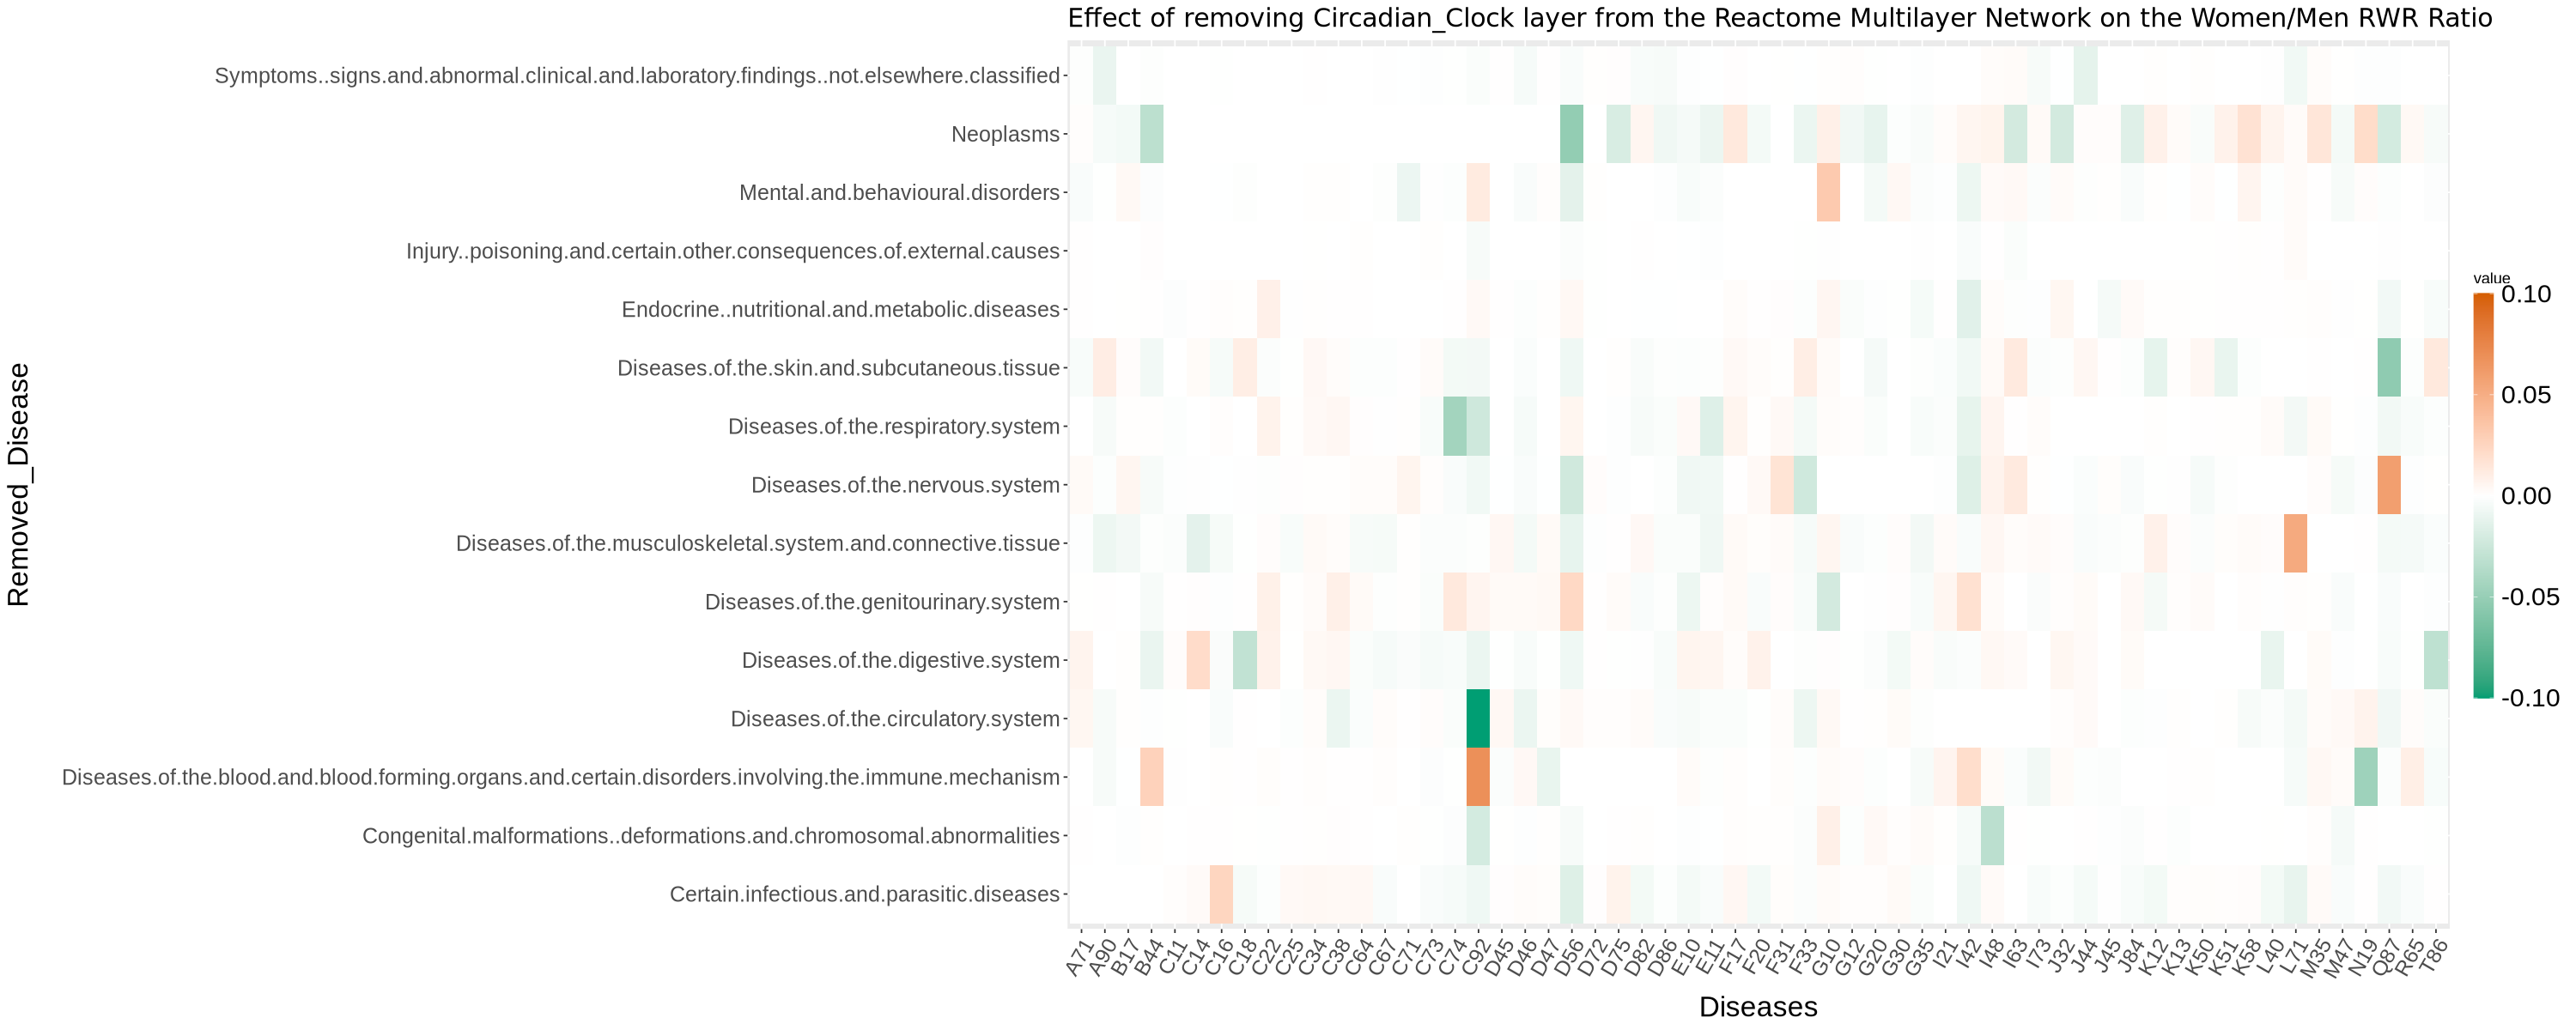

In [99]:
ratio_calculation_per_category(women_tab = women_files,men_tab= men_files,layer = 'Circadian_Clock')[[2]]


In [100]:
getwd()

[1] "/media/inunez/4tb/BSC_Machine_January_24/Desktop/Sex_Comorbidities/Sex_Comorbidities"

In [101]:
names(women_files)

[1] "Autophagy"                           
 [2] "Cell_Cycle"                          
 [3] "Cell-Cell_communication"             
 [4] "Cellular_responses_to_stimuli"       
 [5] "Chromatin_organization"              
 [6] "Circadian_Clock"                     
 [7] "Developmental_Biology"               
 [8] "Disease"                             
 [9] "DNA_Repair"                          
[10] "DNA_Replication"                     
[11] "Drug_ADME"                           
[12] "Extracellular_matrix_organization"   
[13] "Gene_expression_Transcription"       
[14] "Hemostasis"                          
[15] "Immune_System"                       
[16] "Metabolism_of_proteins"              
[17] "Metabolism_of_RNA"                   
[18] "Metabolism"                          
[19] "Mitochondria_All"                    
[20] "Muscle_contraction"                  
[21] "Neuronal_System"                     
[22] "Organelle_biogenesis_and_maintenance"
[23] "Programmed_Cell_Death"               
[24] "Protein_localization"                
[25] "Reproduction"                        
[26] "Sensory_Perception"                  
[27] "Signal_Transduction"                 
[28] "Transport_of_small_molecules"        
[29] "Vesicle-mediated_transport"

In [102]:
for(i in 1:length(names(women_files))){
    didi <- names(women_files)[i]
    su <- ratio_calculation_per_category(women_tab = women_files,men_tab= men_files,layer = didi)
    #su[[2]]
    png(file=paste0('Plots/Removed_Layers_By_Disease_Group/',didi,'_removal_effect_on_RWR_Ratio_By_Category.png'),width = 1920,height = 1080)
    print(su[[2]])
    dev.off()
}

In [103]:
getwd()

[1] "/media/inunez/4tb/BSC_Machine_January_24/Desktop/Sex_Comorbidities/Sex_Comorbidities"

### By Disease

In [104]:
# Men Files
men_files <- paste0('Plots/Men_Positive/',list.files('Plots/Men_Positive')[grep('Removed_Disease_RWR_ratio.tsv',list.files('Plots/Men_Positive'))])
men_files <- men_files[-9]
men_files
length(men_files)

#Women Files
women_files <- paste0('Plots/Women_Positive/',list.files('Plots/Women_Positive')[grep('Removed_Disease_RWR_ratio.tsv',list.files('Plots/Women_Positive'))])
women_files <- women_files[-9]
women_files
length(women_files)

men_files <- mclapply(as.list(men_files),function(x) read.table(x,header=T,sep='\t'))
women_files <- mclapply(as.list(women_files),function(x) read.table(x,header=T,sep='\t'))

names_women <- mclapply(strsplit(list.files('Plots/Women_Positive')[grep('Removed_Disease_RWR_ratio.tsv',list.files('Plots/Women_Positive'))],'_removed_layer'),function(x) x[1])[-9]
names(women_files) <- names_women
names_men <- mclapply(strsplit(list.files('Plots/Men_Positive')[grep('Removed_Disease_RWR_ratio.tsv',list.files('Plots/Men_Positive'))],'_removed_layer'),function(x) x[1])[-9]
names(men_files) <- names_men

[1] "Plots/Men_Positive/Autophagy_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                           
 [2] "Plots/Men_Positive/Cell_Cycle_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                          
 [3] "Plots/Men_Positive/Cell-Cell_communication_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"             
 [4] "Plots/Men_Positive/Cellular_responses_to_stimuli_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"       
 [5] "Plots/Men_Positive/Chromatin_organization_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"              
 [6] "Plots/Men_Positive/Circadian_Clock_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                     
 [7] "Plots/Men_Positive/Developmental_Biology_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"               
 [8] "Plots/Men_Positive/Disease_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                             
 [9] "Plots/Men_Positive/DNA_Repair_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                          
[10] "Plots/Men_Positive/DNA_Replication_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                     
[11] "Plots/Men_Positive/Drug_ADME_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                           
[12] "Plots/Men_Positive/Extracellular_matrix_organization_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"   
[13] "Plots/Men_Positive/Gene_expression_Transcription_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"       
[14] "Plots/Men_Positive/Hemostasis_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                          
[15] "Plots/Men_Positive/Immune_System_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                       
[16] "Plots/Men_Positive/Metabolism_of_proteins_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"              
[17] "Plots/Men_Positive/Metabolism_of_RNA_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                   
[18] "Plots/Men_Positive/Metabolism_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                          
[19] "Plots/Men_Positive/Mitochondria_All_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                    
[20] "Plots/Men_Positive/Muscle_contraction_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                  
[21] "Plots/Men_Positive/Neuronal_System_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                     
[22] "Plots/Men_Positive/Organelle_biogenesis_and_maintenance_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"
[23] "Plots/Men_Positive/Programmed_Cell_Death_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"               
[24] "Plots/Men_Positive/Protein_localization_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                
[25] "Plots/Men_Positive/Reproduction_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                        
[26] "Plots/Men_Positive/Sensory_Perception_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                  
[27] "Plots/Men_Positive/Signal_Transduction_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                 
[28] "Plots/Men_Positive/Transport_of_small_molecules_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"        
[29] "Plots/Men_Positive/Vesicle-mediated_transport_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"

[1] 29

[1] "Plots/Women_Positive/Autophagy_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                           
 [2] "Plots/Women_Positive/Cell_Cycle_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                          
 [3] "Plots/Women_Positive/Cell-Cell_communication_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"             
 [4] "Plots/Women_Positive/Cellular_responses_to_stimuli_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"       
 [5] "Plots/Women_Positive/Chromatin_organization_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"              
 [6] "Plots/Women_Positive/Circadian_Clock_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                     
 [7] "Plots/Women_Positive/Developmental_Biology_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"               
 [8] "Plots/Women_Positive/Disease_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                             
 [9] "Plots/Women_Positive/DNA_Repair_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                          
[10] "Plots/Women_Positive/DNA_Replication_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                     
[11] "Plots/Women_Positive/Drug_ADME_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                           
[12] "Plots/Women_Positive/Extracellular_matrix_organization_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"   
[13] "Plots/Women_Positive/Gene_expression_Transcription_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"       
[14] "Plots/Women_Positive/Hemostasis_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                          
[15] "Plots/Women_Positive/Immune_System_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                       
[16] "Plots/Women_Positive/Metabolism_of_proteins_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"              
[17] "Plots/Women_Positive/Metabolism_of_RNA_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                   
[18] "Plots/Women_Positive/Metabolism_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                          
[19] "Plots/Women_Positive/Mitochondria_All_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                    
[20] "Plots/Women_Positive/Muscle_contraction_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                  
[21] "Plots/Women_Positive/Neuronal_System_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                     
[22] "Plots/Women_Positive/Organelle_biogenesis_and_maintenance_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"
[23] "Plots/Women_Positive/Programmed_Cell_Death_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"               
[24] "Plots/Women_Positive/Protein_localization_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                
[25] "Plots/Women_Positive/Reproduction_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                        
[26] "Plots/Women_Positive/Sensory_Perception_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                  
[27] "Plots/Women_Positive/Signal_Transduction_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"                 
[28] "Plots/Women_Positive/Transport_of_small_molecules_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"        
[29] "Plots/Women_Positive/Vesicle-mediated_transport_removed_layer_Disease_vs_Removed_Disease_RWR_ratio.tsv"

[1] 29

In [105]:
ratio_calculation_per_disease <- function(women_tab,men_tab,layer){
   rwr_by_category_women <- women_tab[[layer]]
   rwr_by_category_men <- men_tab[[layer]]
   rownames_to_use <- sort(intersect(rownames(rwr_by_category_men),rownames(rwr_by_category_women))) # Get set of shared diseases
   rwr_by_category_women <- 2^rwr_by_category_women[rownames_to_use,rownames_to_use] #remove non intersecting diseases and remove log2 transform
   rwr_by_category_men <- 2^rwr_by_category_men[rownames_to_use,rownames_to_use] #remove non intersecting diseases and remove log2 transform
   ratio_women_men <- rwr_by_category_women / rwr_by_category_men

   ori_ratio_women_men_by_disease_group <- read.table('RATIO_WOMEN_MEN_By_Disease.tsv')

   ratio_heatmap <- melt(t(ratio_women_men-ori_ratio_women_men_by_disease_group))
   
   colnames(ratio_heatmap )[1:2] <- c('Removed_Disease','Diseases')
   head(ratio_heatmap )

   options(repr.plot.width=25, repr.plot.height=10)
   ploti <- ggplot(data = data.frame(ratio_heatmap), aes(x = Diseases, y = Removed_Disease, fill= value)) + 
       geom_tile() +
       ggtitle(paste0("Effect of removing ",layer," layer from the Reactome Multilayer Network on the Women/Men RWR Ratio"))+
      #scale_fill_viridis_c(begin=0,end=1)+
      #scale_fill_gradientn(colours = colorRampPalette(c('#3ED3D3', 'white','#AC59E3', '#AC59E3'))(100),breaks=c(-0.1,-0.05,0,0.05,0.1),limits=c(-0.15,0.15),midpoint=0)+ #For visualization
      scale_fill_gradient2(midpoint = 0,low='#009e73',mid='white',high='#d55e00',breaks=c(-0.1,-0.05,0,0.05,0.1),limits=c(-0.1,0.1),oob = scales::squish)+ #Squish puts one instance outside this limits inside. 
      #scale_fill_gradientn(colors = hcl.colors(20, "RdYlGn"))+
      facet_grid()+
      theme(axis.text.x = element_text(angle = 60, vjust = 1, hjust=1,size=15),
        plot.title = element_text(family = "Montserrat", size = (18)),
        axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0),size=20),
        axis.text.y = element_text( vjust = 0.5, hjust=1,size=15),
        axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0),size=20),
        legend.text = element_text(size=18),
        legend.key.size = unit(2, 'cm'),
        legend.key.width= unit(0.5, 'cm')
      )
res <- list(ratio_women_men,ploti)    
}

In [106]:
for(i in 1:length(names(women_files))){
    didi <- names(women_files)[i]
    su <- ratio_calculation_per_disease(women_tab = women_files,men_tab= men_files,layer = didi)
    #su[[2]]
    png(file=paste0('Plots/Removed_Layers_By_Disease/',didi,'_removal_effect_on_RWR_Ratio_By_Disease.png'),width = 1920,height = 1080)
    print(su[[2]])
    dev.off()
}